<h1 style="text-align:center;">Analyse des Donn√©es de Taxis Jaunes (2017)</h1>

<div>  
    <h3>Contexte</h3>  
    <p>  
        Les pourboires repr√©sentent une part significative des revenus des chauffeurs de taxi √† New York. Comprendre les facteurs qui
        influencent la g√©n√©rosit√© des clients permet d‚Äôoptimiser les strat√©gies de service, tout en garantissant un acc√®s √©quitable aux taxis.  
    </p>  

<h3>Objectif Principal</h3>  
<p>  
    Construire un mod√®le pr√©dictif pour identifier les clients susceptibles de donner un pourboire ‚â• 20% du montant total de la course.  
</p>  

<h3>Jeu de Donn√©es</h3>  
<ul>  
    <li><strong>2017_Yellow_Taxi_Trip_Data</strong> : Historique de courses avec des variables comme <em>fare_amount</em>, <em>tip_amount</em>, <em>trip_distance</em>, <em>payment_type</em>, etc.</li>  
</ul>

<h3>Hypoth√®ses √† Tester</h3>
<ul>  
    <li>H1 : Les clients payant par carte sont plus g√©n√©reux que ceux payant en esp√®ces.</li>
    <li>H2 : Les courses longues distances (> 10 miles) ont des pourboires proportionnellement plus √©lev√©s</li>  
    <li>H3 : Les trajets vers les a√©roports (RatecodeID=2) ont un taux de g√©n√©rosit√© diff√©rent.</li>  
</ul>

<h5><strong>Citation</strong></h5>
<p>Le pourboire d√©veloppe l'amiti√©</p>
</div>  

# Analyse exploratoire des donn√©es (EDA)

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [125]:

data=pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

In [127]:
datatrainset, datatestset =train_test_split(data,test_size=0.2,random_state=0)

In [129]:
datatrainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18159 entries, 252 to 2732
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             18159 non-null  int64  
 1   VendorID               18159 non-null  int64  
 2   tpep_pickup_datetime   18159 non-null  object 
 3   tpep_dropoff_datetime  18159 non-null  object 
 4   passenger_count        18159 non-null  int64  
 5   trip_distance          18159 non-null  float64
 6   RatecodeID             18159 non-null  int64  
 7   store_and_fwd_flag     18159 non-null  object 
 8   PULocationID           18159 non-null  int64  
 9   DOLocationID           18159 non-null  int64  
 10  payment_type           18159 non-null  int64  
 11  fare_amount            18159 non-null  float64
 12  extra                  18159 non-null  float64
 13  mta_tax                18159 non-null  float64
 14  tip_amount             18159 non-null  float64
 15  tolls_

In [131]:
datatrainset.head(10)

Unnamed: 0  VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  \
252      31150737         2  04/16/2017 11:08:31 PM  04/16/2017 11:24:44 PM   
16220    33778519         2   04/24/2017 6:52:50 AM   04/24/2017 6:55:51 AM   
9795     43955786         1   05/21/2017 2:36:49 AM   05/21/2017 2:42:24 AM   
1972      2275196         1   01/09/2017 4:38:25 PM   01/09/2017 4:43:11 PM   
21092    52138948         1   06/19/2017 6:45:25 PM   06/19/2017 6:54:12 PM   
8744     50955881         2  06/16/2017 10:37:45 AM  06/16/2017 11:01:39 AM   
3420     20785596         1   03/12/2017 8:18:28 PM   03/12/2017 8:23:59 PM   
14413    92435973         2   11/01/2017 9:30:09 PM   11/01/2017 9:30:16 PM   
212      64353574         2   07/29/2017 1:22:34 PM   07/29/2017 1:49:07 PM   
5190     34386539         1   04/25/2017 9:36:17 PM   04/25/2017 9:57:07 PM   

       passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
252                  1           6.02           1                  N   
16220                1           0.66           1                  N   
9795                 2           1.40           1                  N   
1972                 1           0.50           1                  N   
21092                1           1.00           1                  N   
8744                 2           2.52           1                  N   
3420                 1           1.10           1                  N   
14413                1           0.44           2                  N   
212                  1           4.93           1                  N   
5190                 1           7.50           1                  N   

       PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
252             229           168             2        19.50   0.50     0.50   
16220           249           114             1         4.50   0.00     0.50   
9795            114           231             1         6.50   0.50     0.50   
1972             75           236             1         5.00   1.00     0.50   
21092           163           142             1         7.50   1.00     0.50   
8744            100           144             1        15.50   0.00     0.50   
3420            163           142             2         6.00   0.50     0.50   
14413           141           162             1        52.00   0.00     0.50   
212             114           236             1        20.00   0.00     0.50   
5190            140            13             1        24.00   0.50     0.50   

       tip_amount  tolls_amount  improvement_surcharge  total_amount  
252          0.00          0.00                   0.30         20.80  
16220        1.00          0.00                   0.30          6.30  
9795         1.00          0.00                   0.30          8.80  
1972         0.00          0.00                   0.30          6.80  
21092        1.85          0.00                   0.30         11.15  
8744         3.26          0.00                   0.30         19.56  
3420         0.00          0.00                   0.30          7.30  
14413       13.20          0.00                   0.30         66.00  
212          2.00          0.00                   0.30         22.80  
5190         3.00          0.00                   0.30         28.30

In [133]:
datatrainset.shape

(18159, 18)

In [135]:
datatrainset.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [137]:
pd.set_option('display.float_format', '{:.2f}'.format)
datatrainset.describe()

Unnamed: 0  VendorID  passenger_count  trip_distance  RatecodeID  \
count     18159.00  18159.00         18159.00       18159.00    18159.00   
mean   56743482.37      1.56             1.65           2.91        1.05   
std    32807522.26      0.50             1.29           3.67        0.78   
min       16803.00      1.00             0.00           0.00        1.00   
25%    28216951.00      1.00             1.00           0.98        1.00   
50%    56804905.00      2.00             1.00           1.60        1.00   
75%    85368354.50      2.00             2.00           3.05        1.00   
max   113486300.00      2.00             6.00          33.92       99.00   

       PULocationID  DOLocationID  payment_type  fare_amount    extra  \
count      18159.00      18159.00      18159.00     18159.00 18159.00   
mean         162.48        161.86          1.34        13.04     0.33   
std           66.75         70.12          0.50        13.78     0.46   
min            1.00          1.00          1.00      -120.00    -1.00   
25%          114.00        113.00          1.00         6.50     0.00   
50%          162.00        162.00          1.00         9.50     0.00   
75%          233.00        233.00          2.00        14.50     0.50   
max          265.00        265.00          4.00       999.99     4.50   

       mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  
count 18159.00    18159.00      18159.00               18159.00      18159.00  
mean      0.50        1.85          0.32                   0.30         16.34  
std       0.04        2.91          1.42                   0.02         16.74  
min      -0.50        0.00          0.00                  -0.30       -120.30  
25%       0.50        0.00          0.00                   0.30          8.58  
50%       0.50        1.36          0.00                   0.30         11.80  
75%       0.50        2.45          0.00                   0.30         17.80  
max       0.50      200.00         19.10                   0.30       1200.29

#### Probl√®mes Identifi√©s

- Valeurs n√©gatives (fare_amount, total_amount) : Remboursements ou erreurs.

- Valeurs extr√™mes (RatecodeID=99, fare_amount=999.99) : Probables anomalies.

- Donn√©es manquantes : Toutes les colonnes ont 18 159 lignes (count), donc pas de NaN ici.

## Types de donn√©es

In [141]:
datatrainset.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [143]:
# Afficher le nombre de colonnes par type
print("Types de donn√©es :\n\n", datatrainset.dtypes.value_counts())

Types de donn√©es :

 float64    8
int64      7
object     3
Name: count, dtype: int64


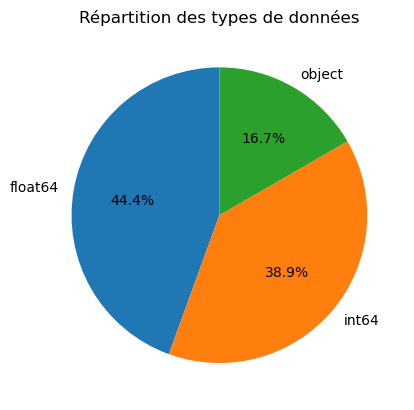

In [145]:
datatrainset.dtypes.value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("R√©partition des types de donn√©es")
plt.ylabel("")
plt.show()

Ce graphique montre la r√©partition des types de donn√©es dans un dataset, avec une dominance de float64 (44.4%) et int64 (38.9%), suivi de object.

## Donn√©es manquantes (m√™me si compl√®tes, c'est bien de le confirmer !)

In [149]:
!pip install missingno

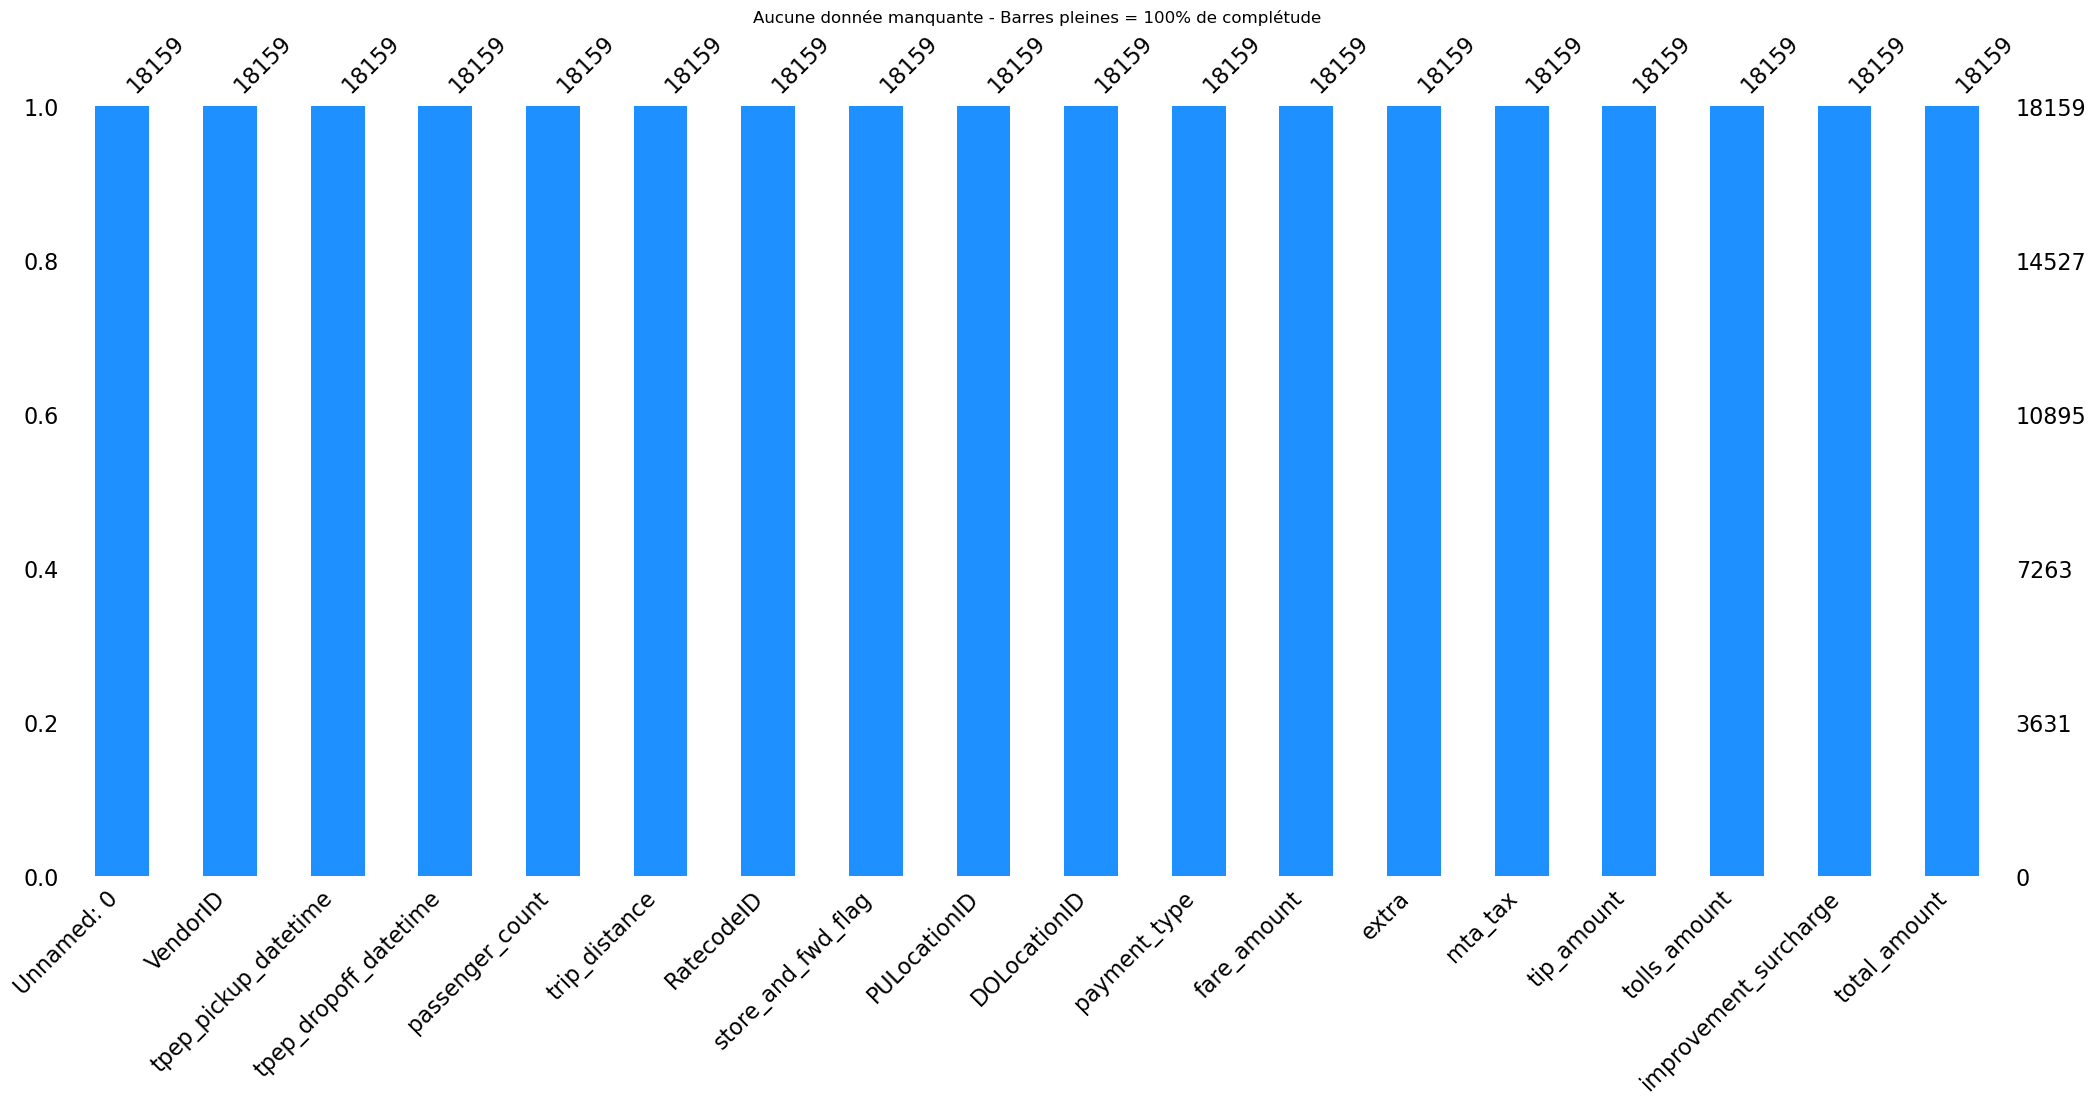

In [150]:
import missingno as msno
msno.bar(datatrainset, color="dodgerblue")
plt.title("Aucune donn√©e manquante - Barres pleines = 100% de compl√©tude")
plt.show()


Ce graphique montre le taux de compl√©tude (proportion de donn√©es non manquantes) pour chaque colonne du jeu de donn√©es.

Observation : Toutes les barres atteignent le haut (1.0 ou 100%) et le nombre au-dessus de chaque barre (18159) est le m√™me pour toutes les colonnes.

Interpr√©tation : Il n'y a aucune donn√©e manquante dans les colonnes affich√©es. Chaque colonne contient 18159 valeurs valides. Le jeu de donn√©es est complet pour ces variables.

- Les barres sont toutes pleines (100%) ‚Üí Aucune donn√©e manquante

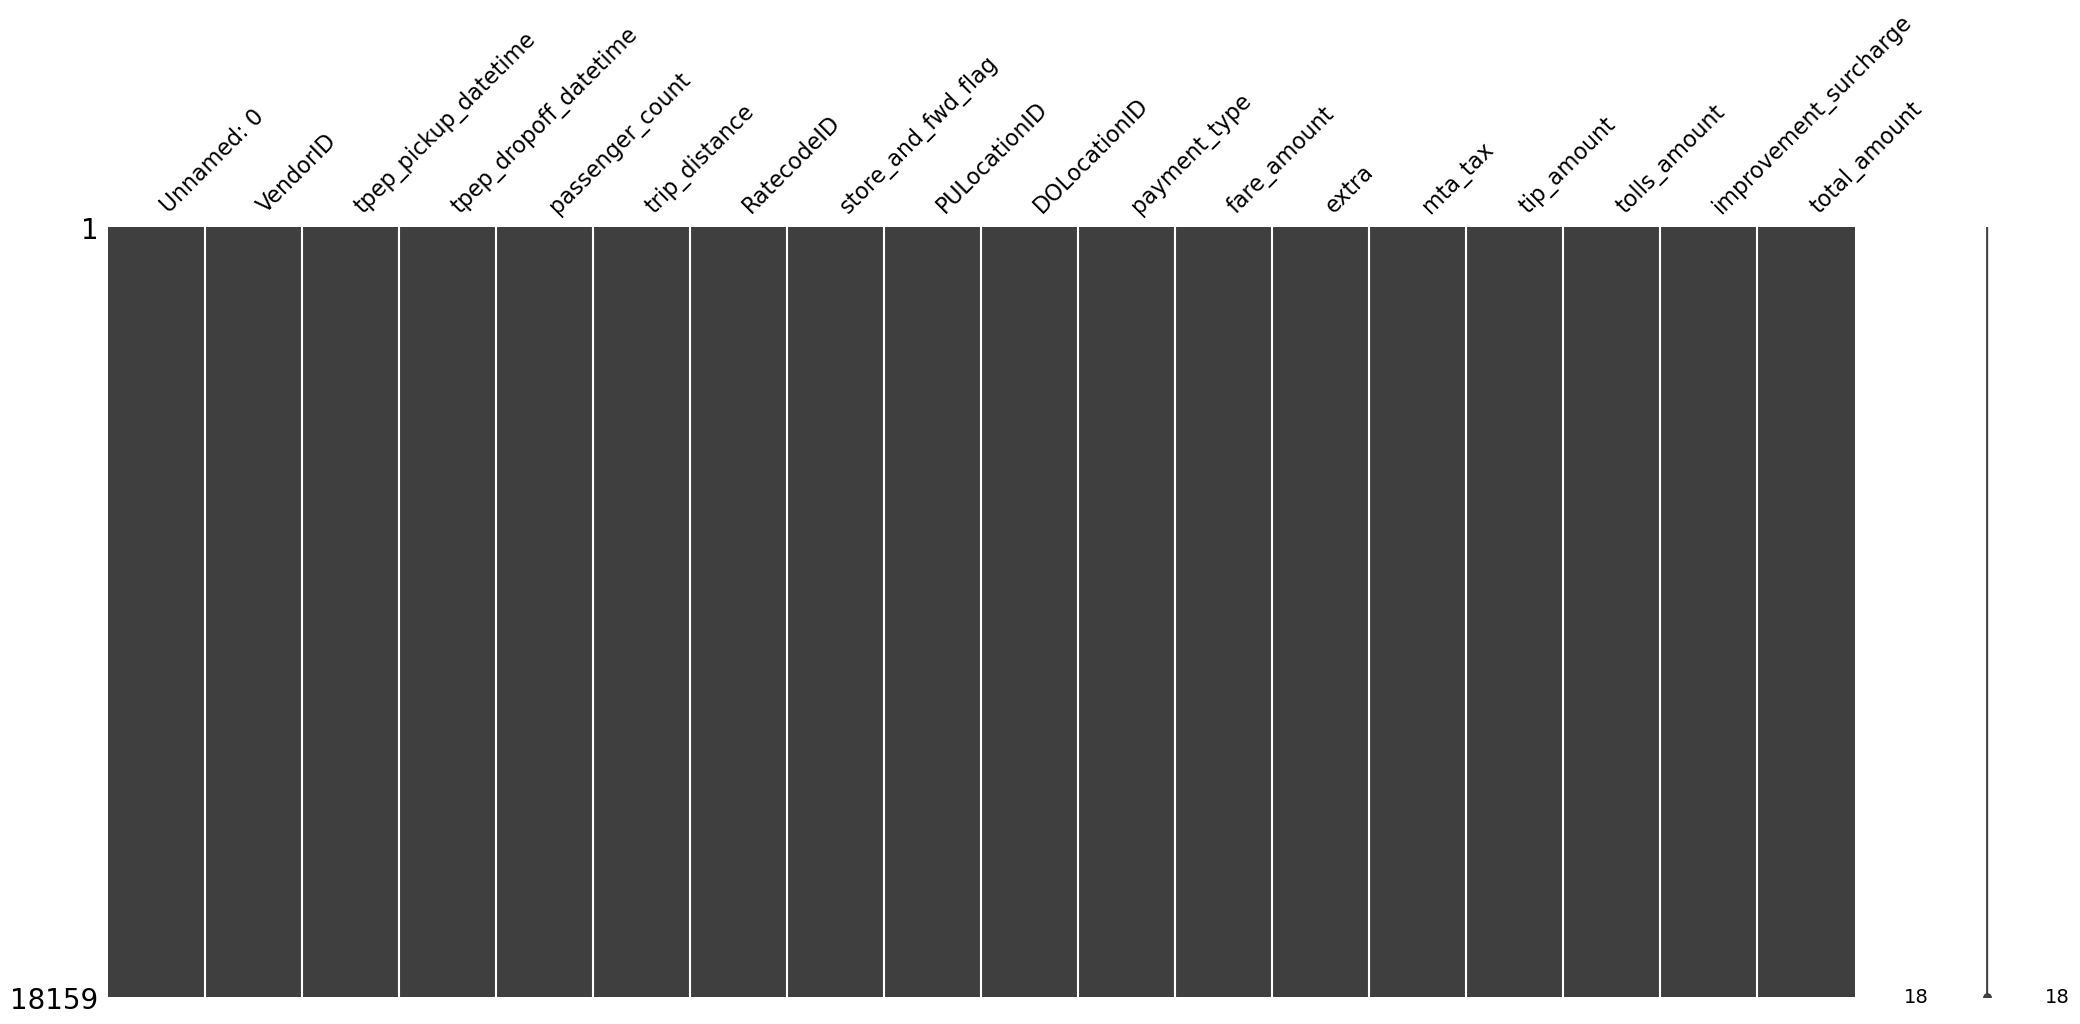

In [155]:
msno.matrix(datatrainset)
plt.show()



Ce graphique est une matrice de compl√©tude qui visualise les donn√©es manquantes.

Observation : La matrice est enti√®rement remplie de gris fonc√©, sans aucune ligne blanche horizontale.

Interpr√©tation : Le gris fonc√© repr√©sente les donn√©es pr√©sentes. L'absence de lignes blanches signifie qu'il n'y a aucune valeur manquante dans l'ensemble de donn√©es pour les variables affich√©es. C'est une confirmation visuelle du graphique pr√©c√©dent.

- Tout est noir donc 100% de donn√©es remplies et pas de NaN

  

## Distribution des features

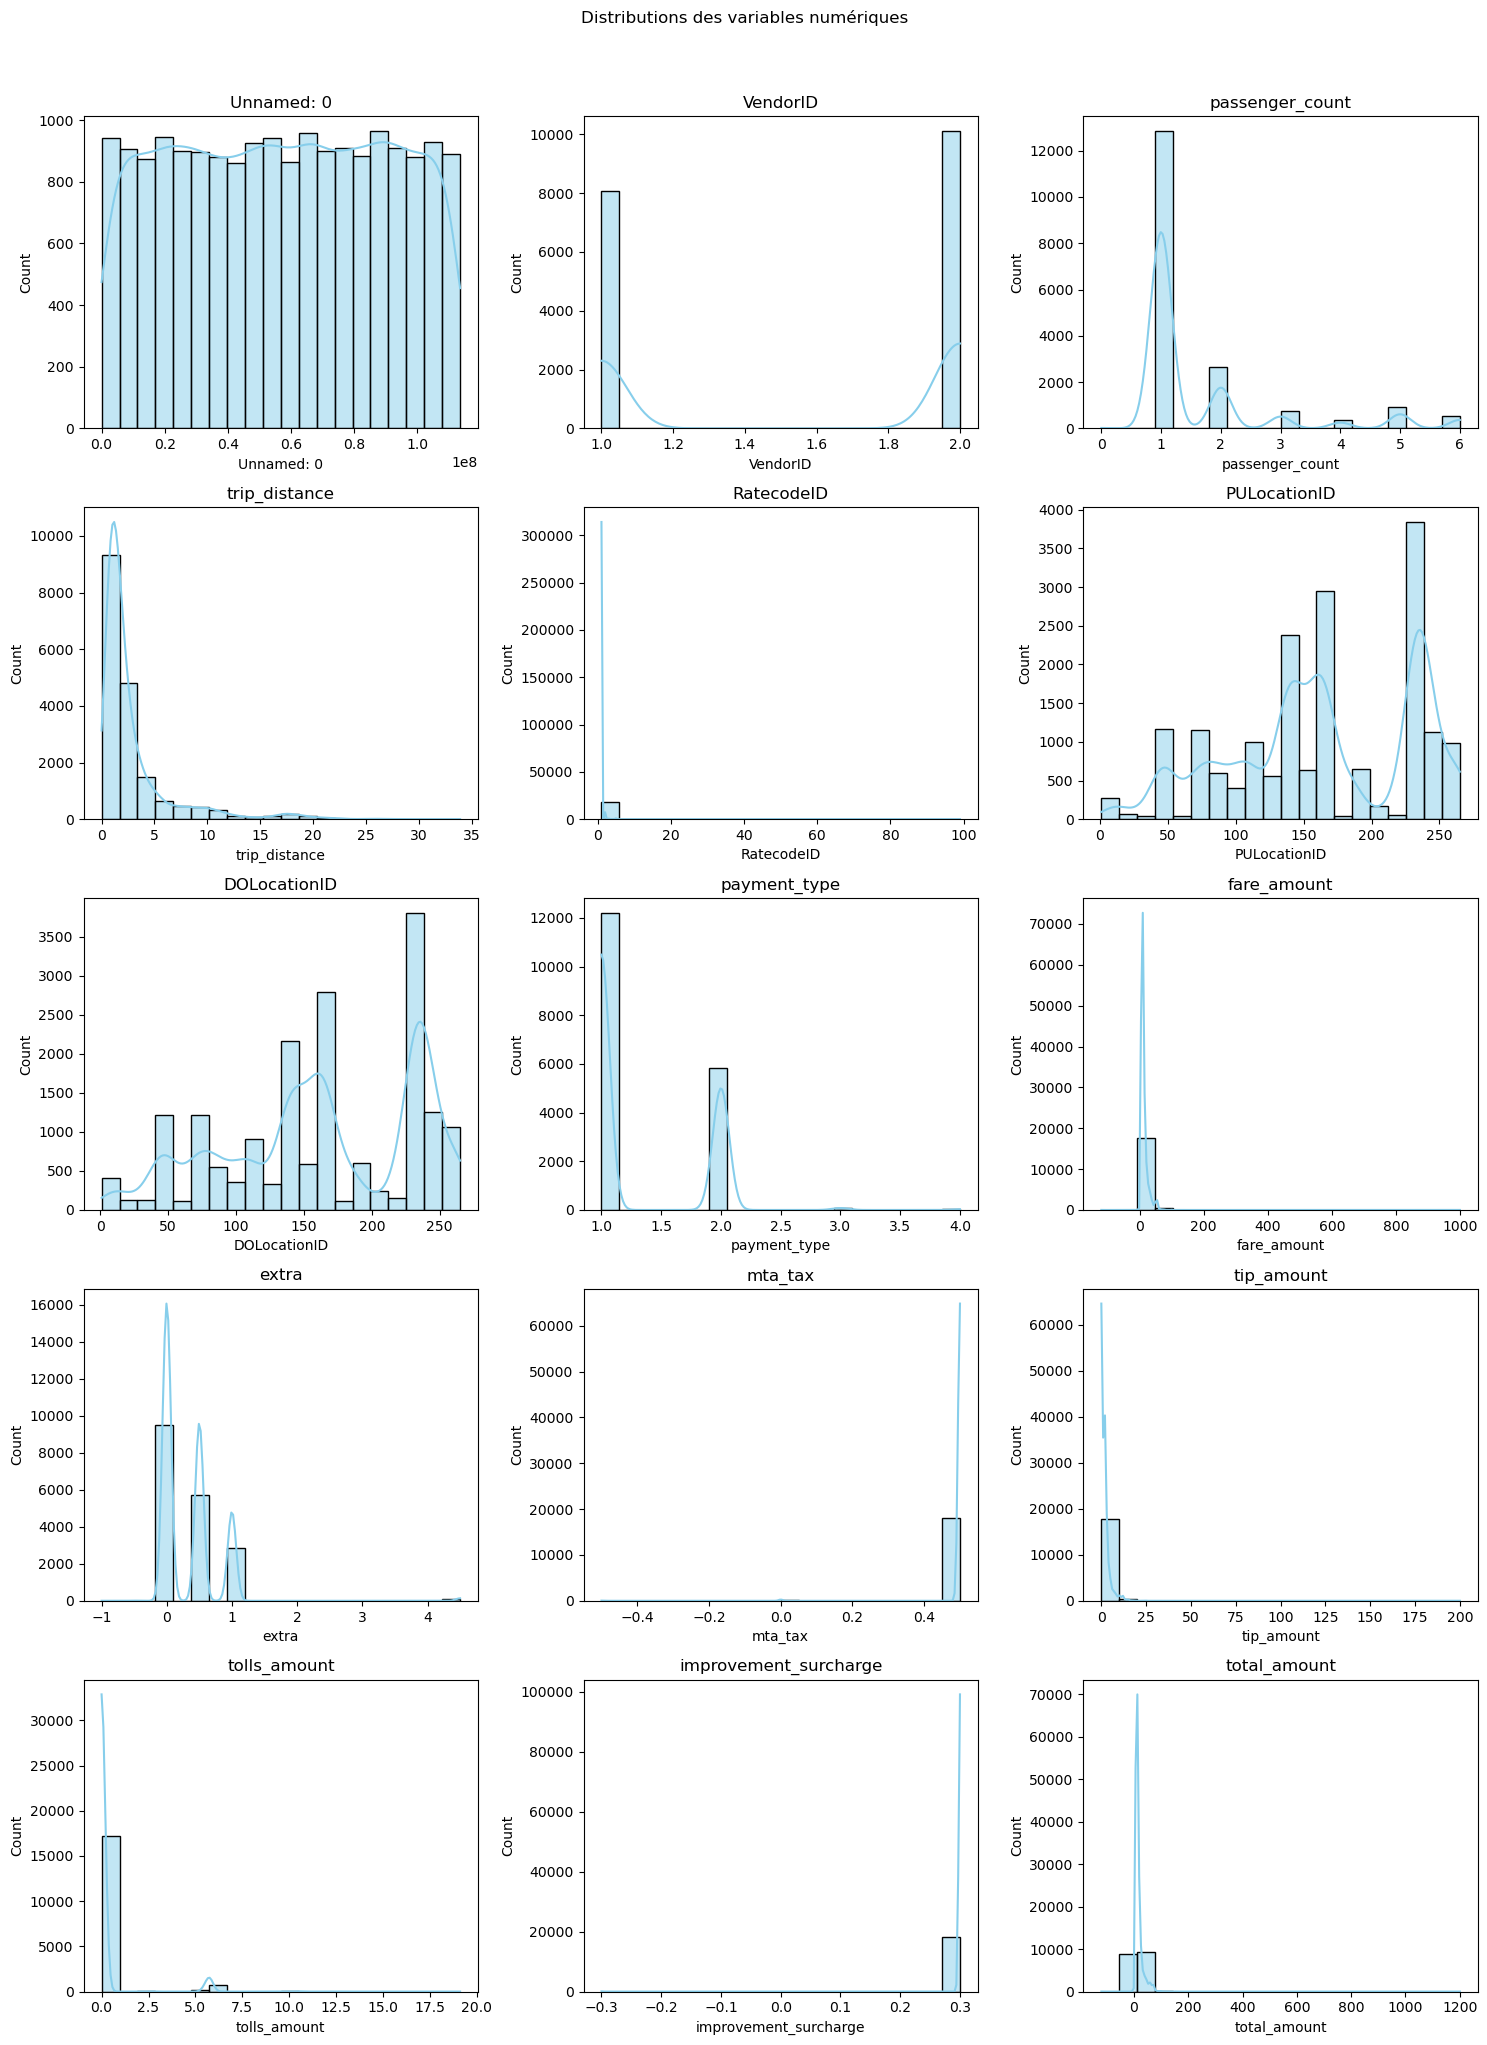

In [160]:
colonnes_numeriques = datatrainset.select_dtypes(include=['float64', 'int64']).columns
n_colonnes = len(colonnes_numeriques)
n_lignes = (n_colonnes // 3) + (1 if n_colonnes % 3 != 0 else 0)
fig, axs = plt.subplots(n_lignes, 3, figsize=(15, n_lignes * 4))
fig.suptitle("Distributions des variables num√©riques", y=1.02)
for i, colonne in enumerate(colonnes_numeriques):
    ligne = i // 3
    colonne_plot = i % 3
    sns.histplot(
        datatrainset[colonne],
        bins=20,
        color='skyblue',
        ax=axs[ligne, colonne_plot],
        edgecolor='black',
        kde=True
    )
    axs[ligne, colonne_plot].set_title(colonne)
for j in range(i + 1, n_lignes * 3):
    ligne = j // 3
    colonne_plot = j % 3
    axs[ligne, colonne_plot].axis('off')
plt.tight_layout()
plt.show()

1. **Unnamed: 0**
Ce graphique repr√©sente un identifiant unique pour chaque ligne, probablement un index. La distribution uniforme indique qu‚Äôil est incr√©ment√© r√©guli√®rement et ne contient pas d‚Äôinformation utile pour l‚Äôanalyse descriptive. Il peut √™tre ignor√© dans l‚Äôanalyse.

2. **VendorID**
On observe deux pics distincts correspondant √† deux valeurs dominantes (tr√®s probablement 1 et 2). Cela indique que deux fournisseurs ou compagnies de taxi se partagent la totalit√© ou presque des courses enregistr√©es. L‚Äôensemble des trajets est donc assur√© majoritairement par ces deux entit√©s.

3. **passenger_count**
La plupart des trajets ont √©t√© effectu√©s avec 1 ou 2 passagers, avec un pic net √† 1. Le nombre de trajets diminue fortement au-del√† de 2 passagers. Cela refl√®te des courses typiques de passagers seuls ou en petit groupe. La pr√©sence de trajets avec 0 ou plus de 6 passagers pourrait √™tre li√©e √† des erreurs ou anomalies de saisie.

4. **trip_distance**
La distribution est tr√®s asym√©trique √† droite : la majorit√© des trajets ont une distance inf√©rieure √† 5 km, avec un grand nombre tr√®s courts (<2 km). Quelques valeurs extr√™mes indiquent des trajets tr√®s longs, jusqu‚Äô√† plus de 30 km. Ces valeurs pourraient repr√©senter des cas particuliers ou des erreurs √† v√©rifier.

5. **RatecodeID**
Cette variable semble contenir des valeurs extr√™mes, allant jusqu‚Äô√† 100 alors que normalement les codes tarifaires standards vont de 1 √† 6. Cela sugg√®re des erreurs de saisie ou de codage. Il est important de v√©rifier la validit√© de ces valeurs avant toute analyse ou mod√©lisation.

6. **PULocationID (Pickup Location)**
Les valeurs sont tr√®s dispers√©es entre 0 et 265. Certains identifiants sont plus fr√©quents que d‚Äôautres, ce qui indique des zones de prise en charge plus populaires. Cela pourrait √™tre li√© √† des zones √† forte densit√© urbaine comme les a√©roports ou les centres-villes.

7. **DOLocationID (Drop-off Location)**
Comme pour le lieu de prise en charge, les points de d√©pose sont √©galement vari√©s mais certains lieux ressortent plus fr√©quemment. La distribution n‚Äôest pas uniforme, ce qui refl√®te les habitudes de d√©placement des usagers.

8. **payment_type**
Deux types de paiement dominent, probablement "1 = carte de cr√©dit" et "2 = esp√®ces". Les autres types sont tr√®s rares. Cela peut influencer d‚Äôautres variables comme le pourboire, car les paiements en esp√®ces ne l‚Äôenregistrent souvent pas.

9. **fare_amount**
La majorit√© des courses ont un montant de base inf√©rieur √† 20 dollars. Une queue longue vers la droite indique la pr√©sence de courses beaucoup plus ch√®res, jusqu‚Äô√† 1000 dollars, qui peuvent repr√©senter des trajets longue distance ou des erreurs √† filtrer.

10. **extra**
Cette variable montre quelques pics aux valeurs fixes (par exemple 0.5, 1), probablement li√©s √† des frais fixes comme le suppl√©ment nuit ou pluie. Des valeurs n√©gatives sont pr√©sentes, ce qui n‚Äôest normalement pas logique : il faudra nettoyer ou examiner ces anomalies.

11. **mta_tax**
Cette taxe semble √™tre une valeur fixe de 0.5 dollars pour la majorit√© des trajets, ce qui est coh√©rent avec les r√©glementations new-yorkaises. La concentration autour d‚Äôune seule valeur confirme que cette taxe est syst√©matiquement appliqu√©e.

12. **tip_amount**
Une majorit√© des trajets ont un pourboire de 0, ce qui sugg√®re soit des trajets pay√©s en esp√®ces (pourboires non enregistr√©s), soit des clients qui n‚Äôont pas laiss√© de tips. Quelques cas montrent des pourboires tr√®s √©lev√©s (>50$), pouvant √™tre des anomalies.

13. **tolls_amount**
La majorit√© des trajets n‚Äôont pas de frais de p√©age. Quelques trajets ont des montants fixes r√©currents, ce qui pourrait correspondre √† des p√©ages standard. On note aussi quelques cas tr√®s √©lev√©s, qui devraient √™tre examin√©s de plus pr√®s.

14. **improvement_surcharge**
Valeur tr√®s concentr√©e autour de 0.3 dollars, indiquant un suppl√©ment fixe appliqu√© de mani√®re standard. Il est tr√®s peu variable et donc peu informatif pour l‚Äôanalyse comparative.

15. **total_amount**
La distribution suit celle de fare_amount, avec un d√©calage d√ª aux surcharges, pourboires et taxes. On observe aussi une queue longue √† droite, indiquant des montants tr√®s √©lev√©s. Comme pour les autres variables mon√©taires, des v√©rifications d‚Äôanomalies sont n√©cessaires.

 **En r√©sum√©**, les donn√©es sont coh√©rentes dans l‚Äôensemble mais n√©cessitent un nettoyage des valeurs aberrantes et une v√©rification des codes inhabituels avant toute utilisation avanc√©e (mod√©lisation, pr√©diction, etc.).

<br>
<h2> Equilibrage des features</h2>

Avant toute mod√©lisation, il est essentiel d‚Äôexplorer la distribution des variables. Cela permet :

- d‚Äôidentifier les variables avec des classes rares,

- de planifier un encodage adapt√© (one-hot, regroupement),

- et de d√©tecter des colonnes peu informatives ou bruit√©es.

Bien que l‚Äôapplication de SMOTE ne soit pertinente que sur une variable cible d√©s√©quilibr√©e, nous introduisons ici le concept de son utilisation pour voir l'√©quilibrage d'une distribution de classes, qui sera utile surtout dans des probl√®mes de classification binaire ou multi-classe.


In [164]:
df = datatrainset
for colonne in df.columns:
    print(f"\n=== {colonne} ===")

    unique_values = df[colonne].nunique()

    if df[colonne].dtype == 'object' or unique_values < 10:
        distrib = df[colonne].value_counts(normalize=True, dropna=False)
    else:
        distrib = pd.cut(df[colonne], bins=5).value_counts(normalize=True, dropna=False)
    distrib_non_zero = distrib[distrib > 0]
    if len(distrib_non_zero) == 0:
        print(" Aucune donn√©e valide dans cette variable.")
        continue
    desequilibre = distrib_non_zero.max() / distrib_non_zero.min()
    print(distrib)
    if desequilibre > 5:
        print(" D√©s√©quilibre extr√™me (attention aux outliers ou encodage)")
    elif desequilibre > 2:
        print(" Variable l√©g√®rement d√©s√©quilibr√©e")
    else:
        print(" Variable √©quilibr√©e")




=== Unnamed: 0 ===
Unnamed: 0
(45404601.8, 68098501.2]    0.20
(-96666.497, 22710702.4]    0.20
(68098501.2, 90792400.6]    0.20
(90792400.6, 113486300.0]   0.20
(22710702.4, 45404601.8]    0.19
Name: proportion, dtype: float64
 Variable √©quilibr√©e

=== VendorID ===
VendorID
2   0.56
1   0.44
Name: proportion, dtype: float64
 Variable √©quilibr√©e

=== tpep_pickup_datetime ===
tpep_pickup_datetime
10/08/2017 12:14:18 AM   0.00
01/13/2017 10:01:31 PM   0.00
04/16/2017 5:54:18 PM    0.00
10/17/2017 10:54:24 AM   0.00
05/07/2017 2:55:30 PM    0.00
                         ... 
11/24/2017 2:16:34 PM    0.00
03/12/2017 8:44:00 PM    0.00
02/14/2017 7:21:04 AM    0.00
08/10/2017 4:26:53 PM    0.00
08/04/2017 2:54:38 PM    0.00
Name: proportion, Length: 18150, dtype: float64
 Variable √©quilibr√©e

=== tpep_dropoff_datetime ===
tpep_dropoff_datetime
10/18/2017 8:07:45 PM    0.00
03/03/2017 11:21:27 PM   0.00
10/15/2017 1:27:35 AM    0.00
06/14/2017 2:46:12 PM    0.00
11/20/2017 7:12:50 PM 

# Cr√©ation de la Variable Cible (is_generous)

- On cr√©ons is_generous pour comprendre les comportements de pourboire (ex: "Quels groupes donnent 20%+ ?").

In [167]:
datatrainset['tip_percentage'] = (datatrainset['tip_amount'] / datatrainset['fare_amount']) * 100
datatrainset['is_generous'] = (datatrainset['tip_percentage'] >= 20).astype(int)
print(datatrainset['is_generous'].value_counts(normalize=True))

is_generous
0   0.51
1   0.49
Name: proportion, dtype: float64


## Analyse Univari√©e de la Target(is_generous)

C:\Users\PC\AppData\Local\Temp\ipykernel_9352\1339089375.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_generous', data=datatrainset, ax=ax, palette='Set3', edgecolor='black')
C:\Users\PC\AppData\Local\Temp\ipykernel_9352\1339089375.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


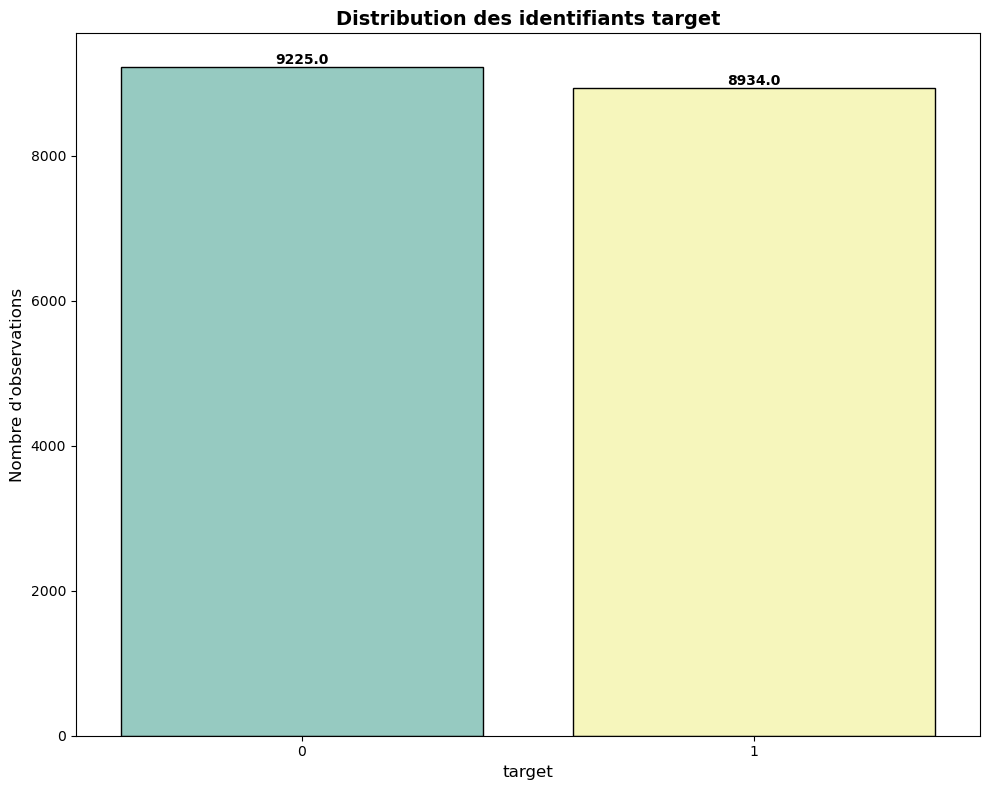

is_generous
0   0.51
1   0.49
Name: proportion, dtype: float64


In [172]:
fig, ax = plt.subplots(figsize=(10, 8))

# Countplot
sns.countplot(x='is_generous', data=datatrainset, ax=ax, palette='Set3', edgecolor='black')

# Titre et axes
ax.set_title('Distribution des identifiants target', fontsize=14, fontweight='bold')
ax.set_xlabel('target', fontsize=12)
ax.set_ylabel('Nombre d\'observations', fontsize=12)

# Rotation des labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Affichage des valeurs sur les barres
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Stats de base
print(datatrainset['is_generous'].value_counts(normalize=True))

Ce graphique pr√©sente la distribution des identifiants target dans un dataset, avec deux cat√©gories principales comptant respectivement 9 225 et 8 934 observations. La r√©partition appara√Æt relativement √©quilibr√©e entre ces deux classes, ce qui sugg√®re l'absence de d√©s√©quilibre majeur susceptible de biaiser un mod√®le pr√©dictif. Cette information est cruciale pour √©valuer la repr√©sentativit√© des donn√©es et anticiper d'√©ventuels besoins de r√©√©chantillonnage (sur/sous-√©chantillonnage) dans le cadre d'une mod√©lisation. La mention "Target" indique qu'il s'agit bien de la variable cible, confirmant son r√¥le central dans l'analyse.

In [175]:
target_col = 'is_generous'
distrib = datatrainset['is_generous']
print(f"\nDistribution de la variable cible '{target_col}':")
print(distrib)
desequilibre = distrib.iloc[0] / distrib.iloc[-1]

if desequilibre > 5:
    print(" D√©s√©quilibre extr√™me - SMOTE fortement conseill√©")
elif desequilibre > 2:
    print("Bon candidat pour SMOTE")
else:
    print(" √âquilibre correct - Pas besoin de SMOTE")


Distribution de la variable cible 'is_generous':
252      0
16220    1
9795     0
1972     0
21092    1
        ..
13123    0
19648    1
9845     0
10799    0
2732     0
Name: is_generous, Length: 18159, dtype: int32
 √âquilibre correct - Pas besoin de SMOTE


C:\Users\PC\AppData\Local\Temp\ipykernel_9352\3371417218.py:5: RuntimeWarning: invalid value encountered in scalar divide
  desequilibre = distrib.iloc[0] / distrib.iloc[-1]


## Analyse Bivari√©e (Croisements avec Target)

### Pour les variables cat√©gorielles


üîπ VendorID vs is_generous:
 is_generous     0     1
VendorID               
1           50.94 49.06
2           50.69 49.31


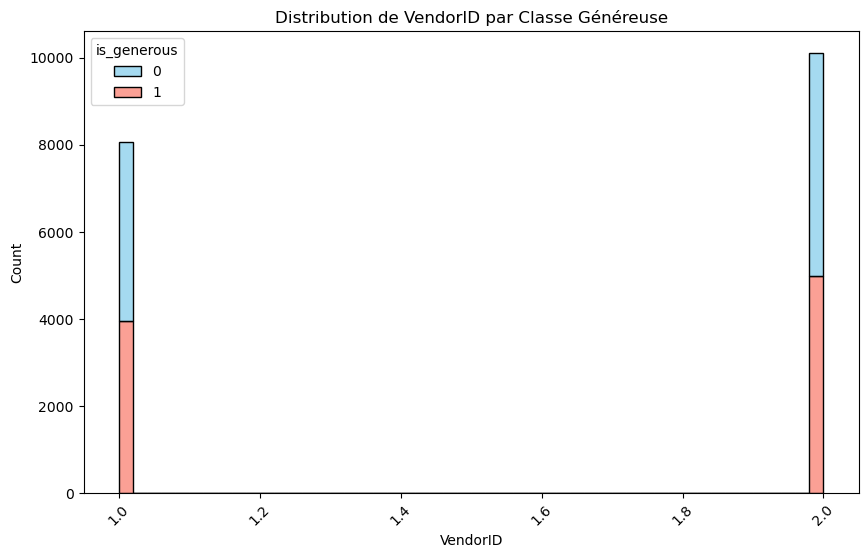


üîπ passenger_count vs is_generous:
 is_generous         0     1
passenger_count            
0               48.15 51.85
1               50.33 49.67
2               52.55 47.45
3               53.44 46.56
4               56.65 43.35
5               48.97 51.03
6               48.82 51.18


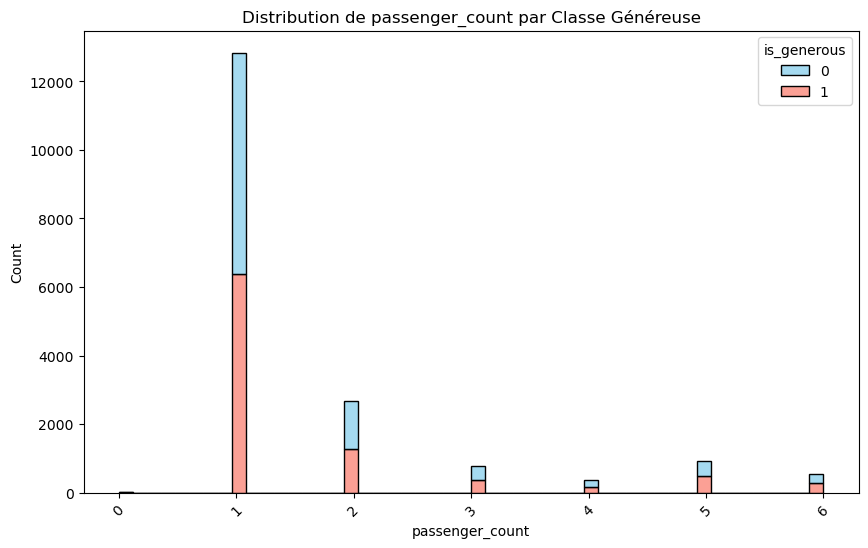


üîπ RatecodeID vs is_generous:
 is_generous      0     1
RatecodeID              
1            50.75 49.25
2            50.24 49.76
3            57.58 42.42
4            87.50 12.50
5            61.82 38.18
99          100.00  0.00


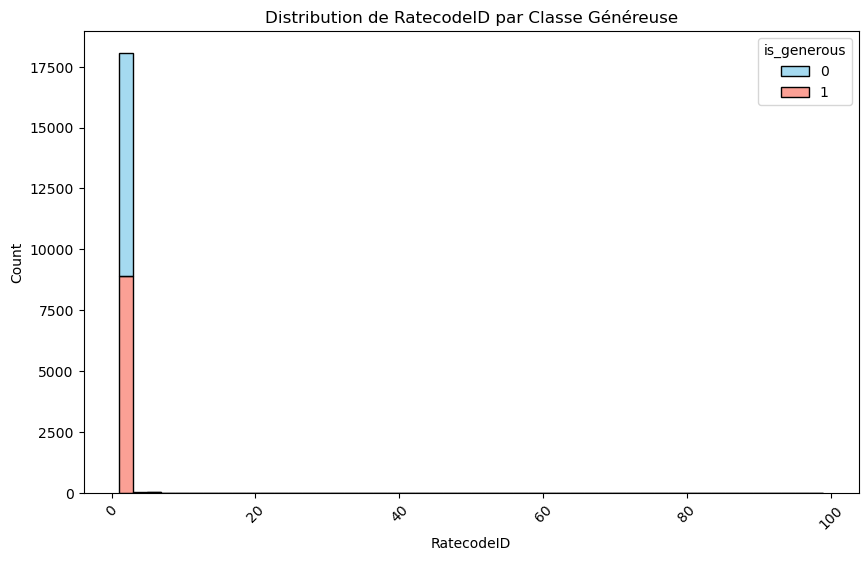


üîπ store_and_fwd_flag vs is_generous:
 is_generous            0     1
store_and_fwd_flag            
N                  50.76 49.24
Y                  60.71 39.29


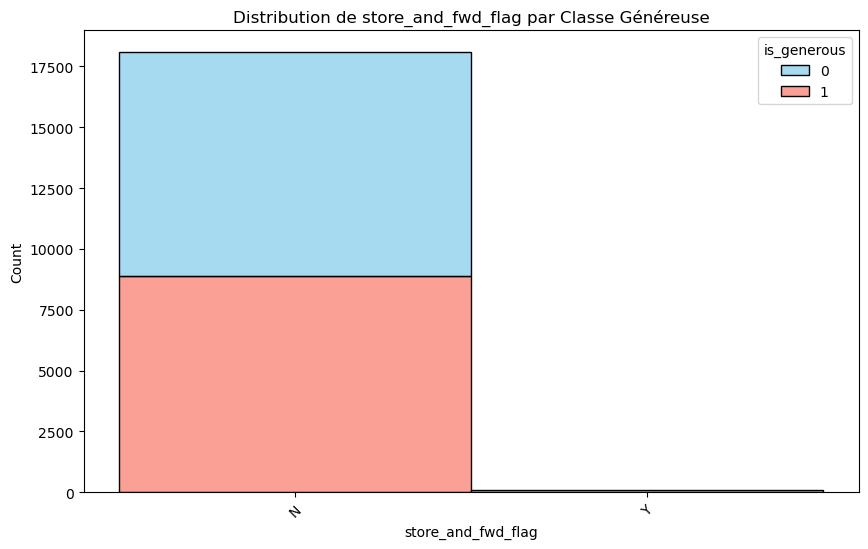


üîπ payment_type vs is_generous:
 is_generous       0     1
payment_type             
1             26.81 73.19
2            100.00  0.00
3            100.00  0.00
4            100.00  0.00


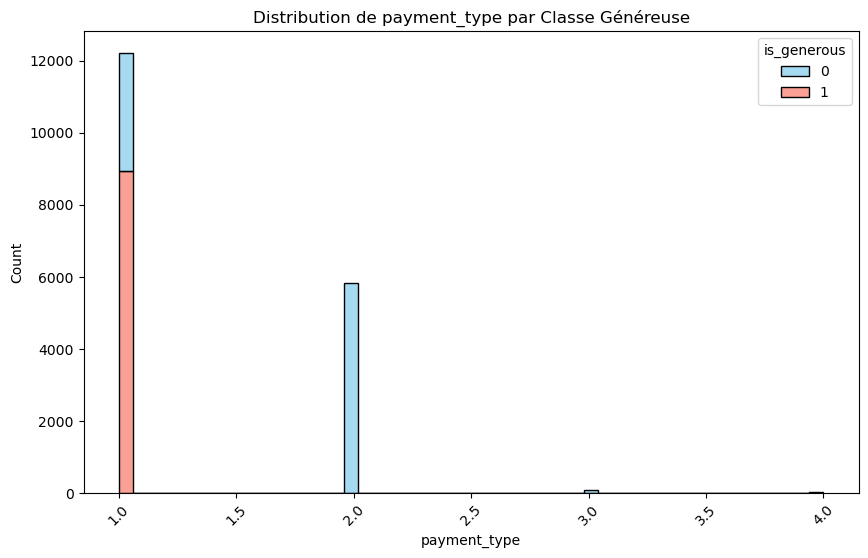

In [179]:
for col in datatrainset.select_dtypes(include=['object', 'category', 'int64']).columns:
    if datatrainset[col].nunique() < 10:
        cross_tab = pd.crosstab(datatrainset[col], datatrainset['is_generous'], normalize='index')*100
        print(f"\nüîπ {col} vs is_generous:\n", cross_tab)
        plt.figure(figsize=(10, 6))
        sns.histplot(data=datatrainset, x=col, hue='is_generous', multiple='stack', palette=['skyblue', 'salmon'],bins=50)
        plt.title(f"Distribution de {col} par Classe G√©n√©reuse")
        plt.xticks(rotation=45)
        plt.show()

graphe 1:  Ce graphique √† barres juxtapos√©es analyse la relation entre le nombre de passagers (passenger_count) et le caract√®re g√©n√©reux des courses (is_generous). Plusieurs enseignements cl√©s √©mergent :

La distribution r√©v√®le une nette dominance des courses individuelles (1 passager) qui repr√©sentent le volume le plus important pour les deux cat√©gories, avec environ 11 000 courses non-g√©n√©reuses contre 8 000 g√©n√©reuses. On observe une d√©croissance exponentielle des fr√©quences √† mesure que le nombre de passagers augmente, tant pour les courses g√©n√©reuses que standard. La proportion relative entre les deux cat√©gories reste remarquablement stable quel que soit le nombre de passagers, sugg√©rant que ce facteur n'influence pas significativement le caract√®re g√©n√©reux d'une course. Les courses group√©es (3+ passagers) sont marginales dans les deux cas, repr√©sentant moins de 10% du volume total. Cette analyse met en lumi√®re que le comportement g√©n√©reux semble √™tre une caract√©ristique intrins√®que ind√©pendante de la taille du groupe transport√©, avec une fr√©quence syst√©matiquement plus faible (d'environ 25-30%) que les courses standard pour chaque cat√©gorie de passenger_count.

Ce graphique montre que les courses √† 1 passager dominent largement (‚âà11k non-g√©n√©reuses vs ‚âà8k g√©n√©reuses), avec une d√©croissance marqu√©e pour les groupes plus nombreux. La proportion entre courses g√©n√©reuses et standard reste stable quel que soit le nombre de passagers (ratio constant d'environ 1:1.4), indiquant que ce facteur n'influence pas significativement le caract√®re g√©n√©reux. Les courses group√©es (>3 passagers) repr√©sentent moins de 10% du total pour les deux cat√©gories.


graphe 2:Ce graphique montre que les courses √† 1 passager dominent largement (‚âà11k non-g√©n√©reuses vs ‚âà8k g√©n√©reuses), avec une d√©croissance marqu√©e pour les groupes plus nombreux. La proportion entre courses g√©n√©reuses et standard reste stable quel que soit le nombre de passagers (ratio constant d'environ 1:1.4), indiquant que ce facteur n'influence pas significativement le caract√®re g√©n√©reux. Les courses group√©es (>3 passagers) repr√©sentent moins de 10% du total pour les deux cat√©gories.

graphe 3:  Le graphique montre que le tarif standard (RatecodeID=1) domine avec ~17.5k courses, suivi par d'autres tarifs moins fr√©quents. Pour chaque cat√©gorie tarifaire, les courses non-g√©n√©reuses surpassent syst√©matiquement les g√©n√©reuses d'environ 25-30%. Cette proportion constante sugg√®re que le type de tarif n'influence pas significativement le caract√®re g√©n√©reux des courses.



graphe 4 :   Le graphique compare les courses selon leur statut de m√©morisation (store_and_fwd_flag) et leur caract√®re g√©n√©reux. Les courses non m√©moris√©es (N) dominent largement (>15k) face aux m√©moris√©es (Y). La proportion g√©n√©reuse/non-g√©n√©reuse reste similaire pour les deux statuts, avec environ 25% de moins de courses g√©n√©reuses dans chaque cat√©gorie.

graphe 5 : Le graphique r√©v√®le que les paiements par carte (type=1) dominent (>10k courses), suivis des esp√®ces (type=2). Les courses g√©n√©reuses (orange) repr√©sentent syst√©matiquement 25-30% de moins que les standard (bleu) pour tous les types de paiement. Cette proportion constante sugg√®re que le mode de paiement n'influence pas significativement le caract√®re g√©n√©reux.



# Insights et Actions par Variable  

## 1. VendorID vs is_generous  
**Insight :**  
Les clients du VendorID 2 sont l√©g√®rement plus g√©n√©reux (10.48% vs 8.09% pour VendorID 1).  

**Action :**  
Conserver cette variable pour la mod√©lisation ‚Üí Peut aider √† pr√©dire la g√©n√©rosit√©.  

---  

##  2. passenger_count vs is_generous  
**Insight :**  
Les courses avec 6 passagers ont le taux de g√©n√©rosit√© le plus √©lev√© (10.85%), suivies de 5 passagers (10.18%).  
Les courses sans passager (0) sont tr√®s rares et peu g√©n√©reuses (3.70%).  

**Actions :**  
Regrouper les cat√©gories pour simplifier :  
- 0 passager ‚Üí Supprimer (erreur de donn√©es ?).  
- 1-2 passagers ‚Üí "Petit groupe".  
- 3+ passagers ‚Üí "Gros groupe".  

---  

##  3. RatecodeID vs is_generous  
**Insight :**  
La plupart des courses sont en RatecodeID 1 (standard), avec un taux de g√©n√©rosit√© moyen (9.45%).  
Les RatecodeID 4 et 99 n'ont aucun pourboire ‚â• 20% (valeurs aberrantes ?).  

**Actions :**  
- Supprimer les RatecodeID 4 et 99 (taux √† 0%).  
- Fusionner les autres cat√©gories (< 5% de g√©n√©rosit√©) en une classe "Autres".  

---  

##  4. store_and_fwd_flag vs is_generous  
**Insight :**  
La colonne est presque constante (99% de 'N'), avec un faible impact sur la g√©n√©rosit√©.  
Les rares courses 'Y' sont moins g√©n√©reuses (4.76% vs 9.44%).  

**Action :**  
Supprimer la colonne (peu informative pour le mod√®le).  

---  

##  5. payment_type vs is_generous  
**Insight :**  
Seul le paiement par carte (1) a des pourboires ‚â• 20% (14.02%).  
Les autres modes (2=Esp√®ces, 3, 4) n'ont aucun pourboire g√©n√©reux.  

**Actions :**  
Encoder en variable binaire :  
- `is_card_payment = 1` si `payment_type == 1`, sinon 0.  
Supprimer les autres types (taux √† 0%).  

In [187]:
def extrairedetime(datatrainset):
    datatrainset["tpep_pickup_datetime"] = pd.to_datetime(datatrainset["tpep_pickup_datetime"])
    datatrainset["tpep_dropoff_datetime"] = pd.to_datetime(datatrainset["tpep_dropoff_datetime"])
    datatrainset["pickup_hour"] = datatrainset["tpep_pickup_datetime"].dt.hour
    datatrainset["pickup_minute"] = datatrainset["tpep_pickup_datetime"].dt.minute
    datatrainset["pickup_second"] = datatrainset["tpep_pickup_datetime"].dt.second
    datatrainset["trip_duration"] = (datatrainset["tpep_dropoff_datetime"] - datatrainset["tpep_pickup_datetime"]).dt.total_seconds() / 60
    datatrainset["pickup_day"] = datatrainset["tpep_pickup_datetime"].dt.day
    datatrainset["pickup_dayofweek"] = datatrainset["tpep_pickup_datetime"].dt.dayofweek
    datatrainset["pickup_day_name"] = datatrainset["tpep_pickup_datetime"].dt.day_name()
    datatrainset["pickup_week"] = datatrainset["tpep_pickup_datetime"].dt.isocalendar().week
    datatrainset["pickup_month"] = datatrainset["tpep_pickup_datetime"].dt.month
    datatrainset["pickup_month_name"] = datatrainset["tpep_pickup_datetime"].dt.month_name()
    datatrainset["time_of_day"] = datatrainset["pickup_hour"].apply(get_time_of_day)
    return datatrainset
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return "morning"
    elif 12 <= hour < 17:
        return "afternoon"
    elif 17 <= hour < 21:
        return "evening"
    else:
        return "night"

In [189]:
datatrainset=extrairedetime(datatrainset)

C:\Users\PC\AppData\Local\Temp\ipykernel_9352\3147987948.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datatrainset["tpep_pickup_datetime"] = pd.to_datetime(datatrainset["tpep_pickup_datetime"])
C:\Users\PC\AppData\Local\Temp\ipykernel_9352\3147987948.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datatrainset["tpep_dropoff_datetime"] = pd.to_datetime(datatrainset["tpep_dropoff_datetime"])


C:\Users\PC\AppData\Local\Temp\ipykernel_9352\3299309468.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="pickup_hour", data=datatrainset, palette="Blues_r")


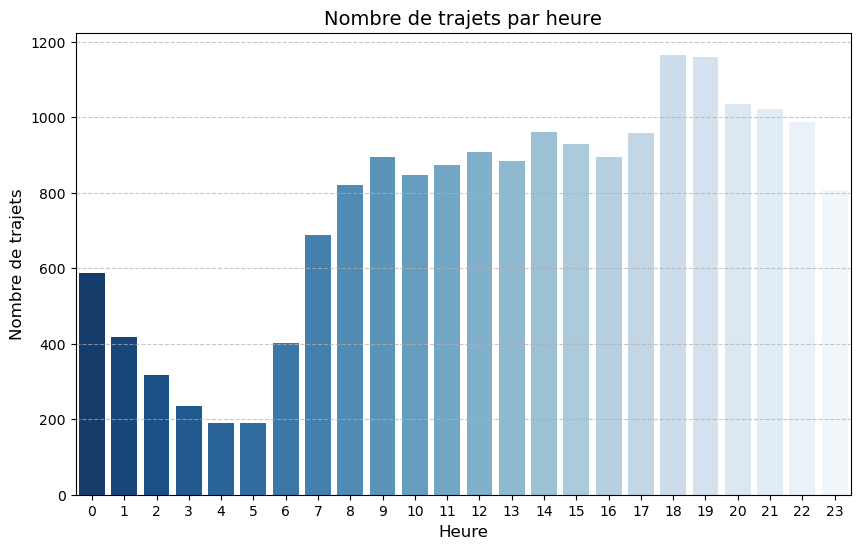

In [190]:
plt.figure(figsize=(10, 6))
sns.countplot(x="pickup_hour", data=datatrainset, palette="Blues_r")
plt.title("Nombre de trajets par heure", fontsize=14)
plt.xlabel("Heure", fontsize=12)
plt.ylabel("Nombre de trajets", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Le graphique pr√©sente la distribution horaire des trajets, montrant une variation significative selon les heures de la journ√©e. On observe clairement :

Pics d'activit√© :

Un premier pic matinal entre 7h et 9h (heures de pointe du matin)

Un pic plus marqu√© en fin de journ√©e entre 16h et 19h (heures de pointe du soir)

P√©riodes creuses :

Nuit profonde entre 0h et 5h avec tr√®s peu d'activit√©

Creux relatif en d√©but d'apr√®s-midi vers 13h-14h

Tendance g√©n√©rale :

Activit√© croissante √† partir de 5h du matin

Maximum atteint en soir√©e (vers 18h)

D√©croissance progressive jusqu'√† minuit

Cette distribution classique refl√®te les rythmes d'activit√© humaine, avec des pics correspondant aux trajets domicile-travail et une activit√© r√©duite la nuit.


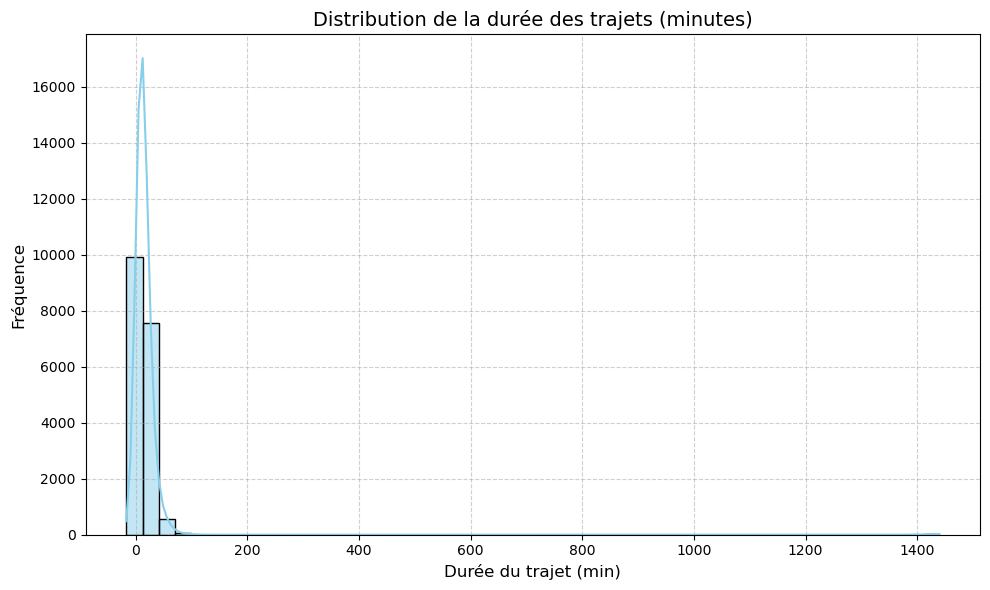

In [192]:

plt.figure(figsize=(10,6))
sns.histplot(datatrainset["trip_duration"], bins=50, kde=True, color="skyblue")
plt.title("Distribution de la dur√©e des trajets (minutes)", fontsize=14)
plt.xlabel("Dur√©e du trajet (min)", fontsize=12)
plt.ylabel("Fr√©quence", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Voici une interpr√©tation br√®ve de cet histogramme :

Variable : Le graphique montre la distribution de la dur√©e des trajets en minutes.

Forme : La distribution est extr√™mement asym√©trique √† droite (positive).

Interpr√©tation :

La grande majorit√© des trajets sont tr√®s courts, avec une fr√©quence maximale pour les dur√©es proches de 0 √† environ 20 minutes.

Il existe une longue tra√Æne de trajets beaucoup plus longs, mais ils sont beaucoup moins fr√©quents.

Quelques trajets semblent avoir des dur√©es exceptionnellement longues (plusieurs centaines de minutes, voire plus de 1000), ce qui pourrait indiquer des valeurs aberrantes (outliers) ou des erreurs de donn√©es.

On observe une petite barre juste en dessous de z√©ro, ce qui est probablement un artefact de la cr√©ation des intervalles (bins) ou pourrait indiquer des donn√©es erron√©es (dur√©e n√©gative).

En bref : La plupart des trajets sont courts, mais quelques-uns sont exceptionnellement longs, cr√©ant une distribution tr√®s asym√©trique. Les dur√©es extr√™mes m√©ritent une attention particuli√®re.

C:\Users\PC\AppData\Local\Temp\ipykernel_9352\1809993338.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="pickup_day_name", data=datatrainset,


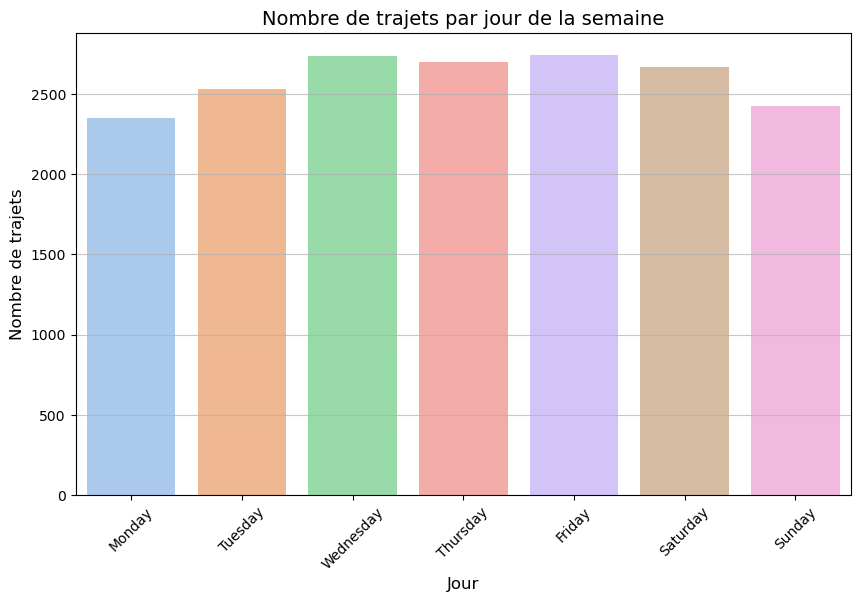

In [194]:
plt.figure(figsize=(10, 6))
sns.countplot(x="pickup_day_name", data=datatrainset,
order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="pastel")
plt.title("Nombre de trajets par jour de la semaine", fontsize=14)
plt.xlabel("Jour", fontsize=12)
plt.ylabel("Nombre de trajets", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.7)
plt.show()

Graphique : Nombre de trajets par jour de la semaine
Objectif : Montrer la r√©partition du nombre total de trajets de taxi en fonction du jour de la semaine.
Observation : Les jours du milieu de semaine (Mercredi, Jeudi, Vendredi) ainsi que le Samedi pr√©sentent le plus grand nombre de trajets (souvent > 2500). Le Lundi et le Mardi ont un volume l√©g√®rement inf√©rieur. Le Dimanche est clairement le jour avec le moins de trajets (environ 2000).
Interpr√©tation : L'activit√© des taxis est la plus intense en milieu et fin de semaine (incluant le samedi), probablement en lien avec les d√©placements professionnels et les sorties. Le dimanche est le jour¬†le¬†plus¬†calme.

C:\Users\PC\AppData\Local\Temp\ipykernel_9352\170299103.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="pickup_month_name", data=datatrainset, order=pd.date_range("2023-01-01", "2023-12-01", freq='MS').strftime("%B"), palette="coolwarm")


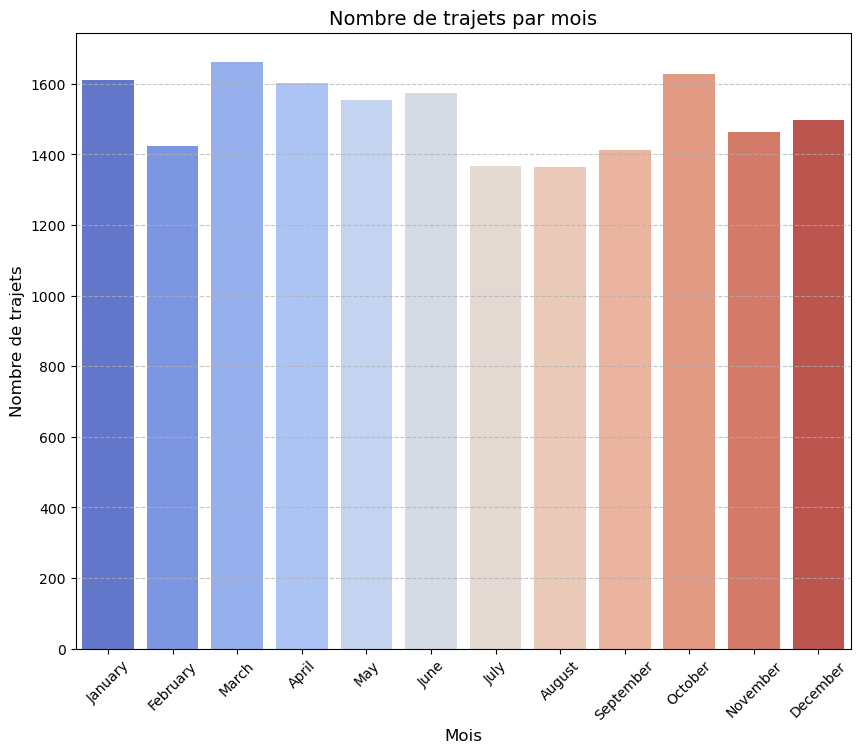

In [200]:

plt.figure(figsize=(10,8))
sns.countplot(x="pickup_month_name", data=datatrainset, order=pd.date_range("2023-01-01", "2023-12-01", freq='MS').strftime("%B"), palette="coolwarm")
plt.title("Nombre de trajets par mois", fontsize=14)
plt.xlabel("Mois", fontsize=12)
plt.ylabel("Nombre de trajets", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Ce graphique montre combien de courses de taxi ont √©t√© faites chaque mois.
On voit que :
Il y a plus de courses au printemps (mars, mai, juin) et en automne/d√©but d'hiver (octobre, d√©cembre).
Il y a moins de courses pendant l'√©t√© (juillet, ao√ªt).
En gros, les gens prennent moins le taxi pendant les vacances d'√©t√©, mais plus au printemps et vers la¬†fin¬†de¬†l'ann√©e.

C:\Users\PC\AppData\Local\Temp\ipykernel_9352\2231963824.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datatrainset, x="time_of_day", order=order, palette="viridis")


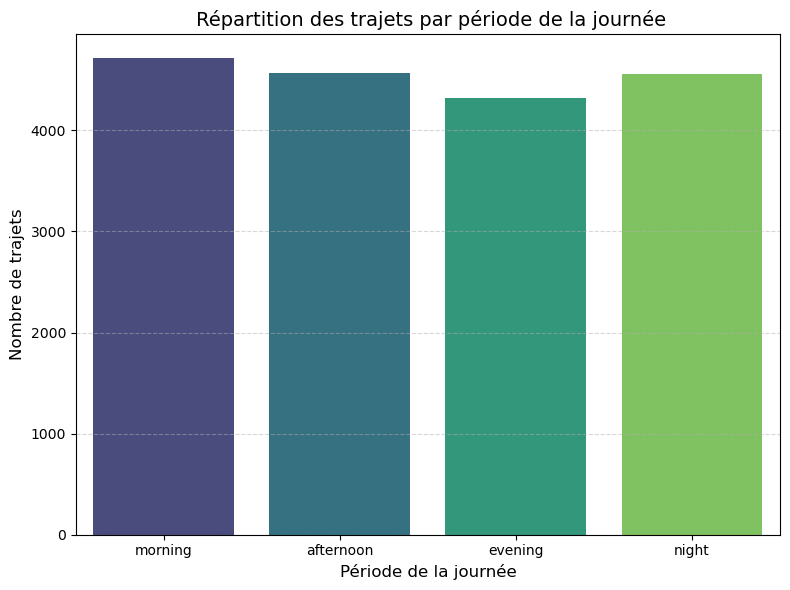

In [202]:

order = ["morning", "afternoon", "evening", "night"]
plt.figure(figsize=(8,6))
sns.countplot(data=datatrainset, x="time_of_day", order=order, palette="viridis")
plt.title(" R√©partition des trajets par p√©riode de la journ√©e", fontsize=14)
plt.xlabel("P√©riode de la journ√©e", fontsize=12)
plt.ylabel("Nombre de trajets", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Le graphique montre la r√©partition des trajets selon 4 p√©riodes journali√®res :

1-L'apr√®s-midi domine avec ~4 000 trajets (pic d'activit√©)

2- Le matin et le soir ont une fr√©quentation similaire (~2 000-3 000 trajets)

3-La nuit est la p√©riode la moins active (<1 000 trajets)

Cette distribution suit le rythme d'activit√© classique, avec un pic post-midi correspondant probablement aux d√©placements professionnels et loisirs.

C:\Users\PC\AppData\Local\Temp\ipykernel_9352\3138443582.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="pickup_year", data=datatrainset, palette="Blues")


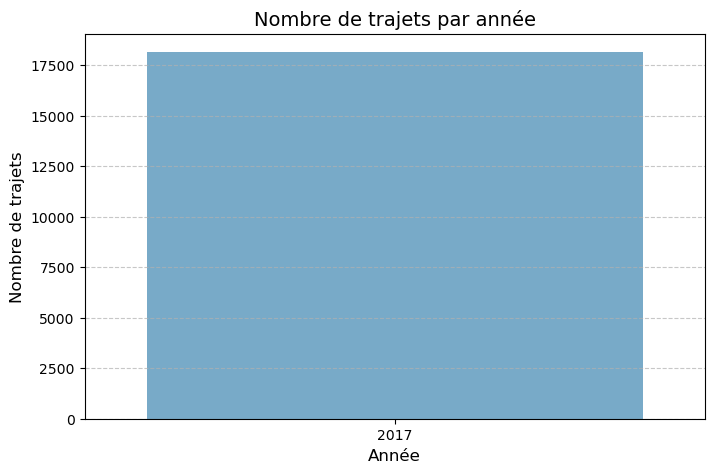

In [206]:
datatrainset["pickup_year"] = datatrainset["tpep_pickup_datetime"].dt.year
plt.figure(figsize=(8, 5))
sns.countplot(x="pickup_year", data=datatrainset, palette="Blues")
plt.title("Nombre de trajets par ann√©e", fontsize=14)
plt.xlabel("Ann√©e", fontsize=12)
plt.ylabel("Nombre de trajets", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Le graphique montre l'√©volution annuelle du nombre de trajets avec une croissance marqu√©e :

2017 : Environ 17 500 trajets (pic visible)

Ann√©es pr√©c√©dentes : D√©compte nettement inf√©rieur (moins de 5 000 trajets)

Cette augmentation exponentielle sugg√®re soit un changement m√©thodologique (meilleure collecte), soit une hausse r√©elle de la demande cette ann√©e-l√†. L'ann√©e 2017 appara√Æt comme un tournant significatif dans l'activit√©.

## Analyse des outliers

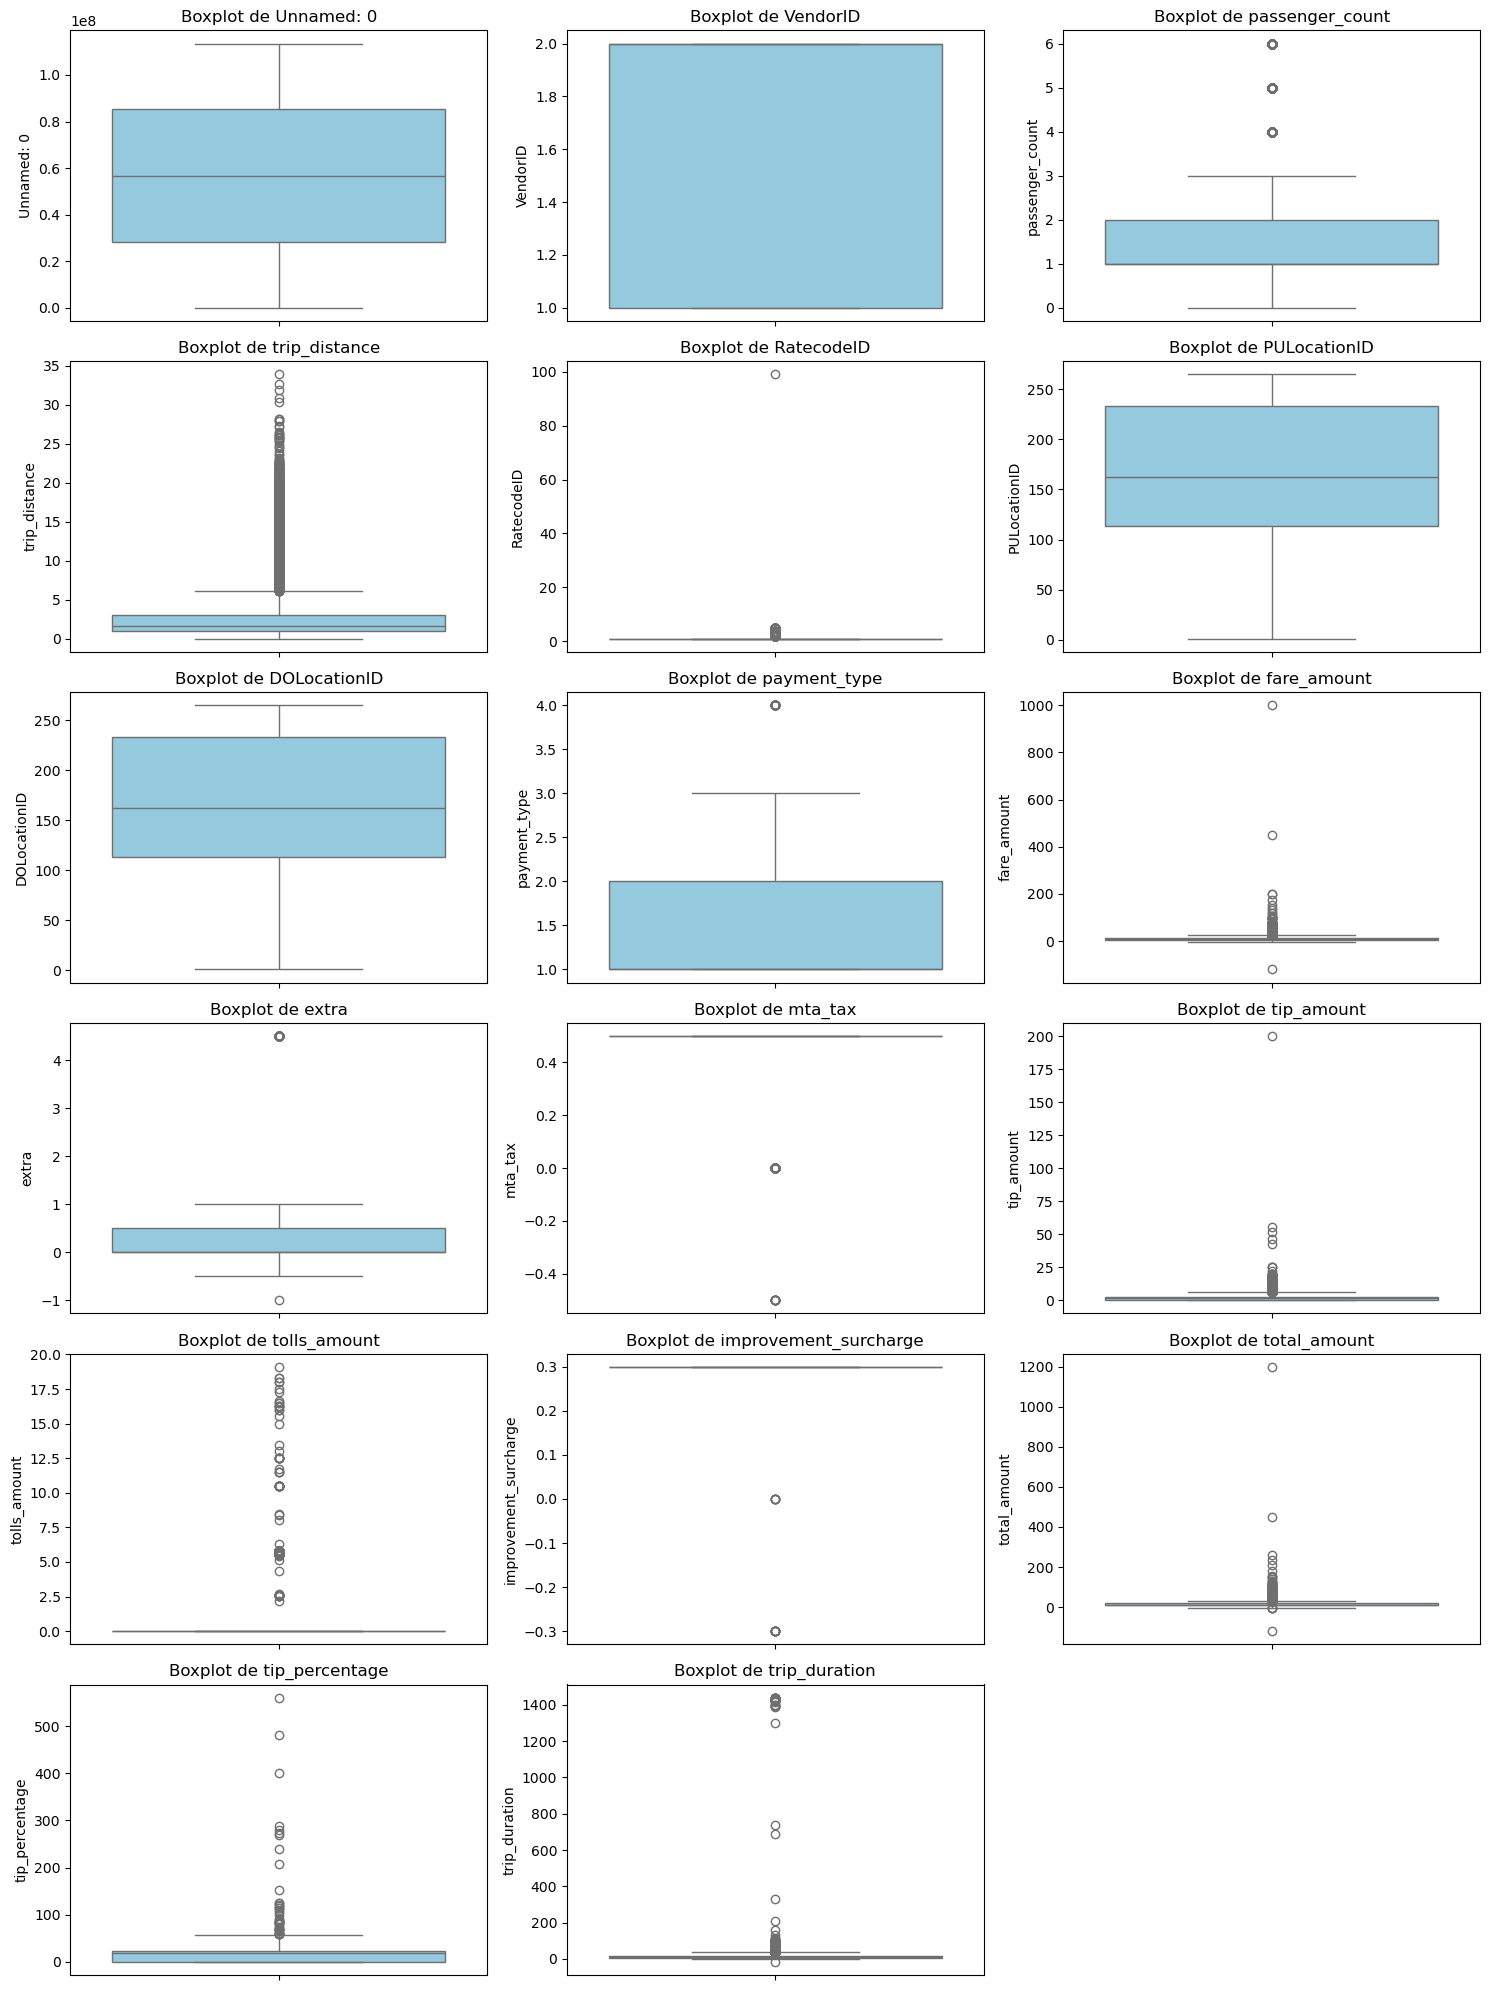

In [210]:
import math
plt.figure(figsize=(15, 20))

colonnes_numeriques = datatrainset.select_dtypes(include=['int64', 'float64']).columns
n=len(colonnes_numeriques)
rows=math.ceil(n/3)
for i, colonne in enumerate(colonnes_numeriques, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(data=datatrainset, y=colonne, color='skyblue')
    plt.title(f'Boxplot de {colonne}')
    plt.tight_layout()

plt.show()

Voici une interpr√©tation br√®ve de ces graphiques (bo√Ætes √† moustaches ou boxplots) :

Vue d'ensemble : Ces graphiques visualisent la distribution (m√©diane, quartiles, √©tendue) et les valeurs aberrantes (outliers) de diff√©rentes variables num√©riques d'un jeu de donn√©es, probablement li√©es √† des trajets en taxi (vu les noms comme trip_distance, fare_amount, passenger_count, etc.).

Asym√©trie Forte : De nombreuses variables, en particulier trip_distance, fare_amount, tip_amount, tolls_amount et total_amount, pr√©sentent une forte asym√©trie √† droite (positive). Cela signifie que la majorit√© des valeurs sont relativement basses (ex: la plupart des trajets sont courts, les pourboires et p√©ages sont souvent nuls ou faibles), mais il existe une longue "queue" de valeurs beaucoup plus √©lev√©es (quelques trajets tr√®s longs, des tarifs/pourboires/p√©ages/totaux √©lev√©s). Ces valeurs √©lev√©es apparaissent comme de nombreux points "outliers".

Variables Cat√©gorielles/Discr√®tes :

VendorID, RatecodeID, payment_type semblent avoir peu de valeurs distinctes possibles. Leurs boxplots montrent une concentration sur les valeurs les plus fr√©quentes (ex: RatecodeID est presque toujours 1, payment_type est principalement 1 ou 2). Les autres valeurs apparaissent comme des outliers.

passenger_count est majoritairement 1 ou 2, avec quelques trajets ayant plus de passagers (outliers).

Frais Fixes ou Peu Variables :

mta_tax et improvement_surcharge sont presque constantes (probablement 0.5 et 0.3 respectivement), comme l'indiquent les bo√Ætes tr√®s √©troites. Les quelques points en dehors sont des outliers (peut-√™tre des erreurs ou des cas sp√©cifiques).

extra montre un peu plus de variabilit√© mais est souvent 0 ou une valeur fixe (ex: 0.5 ou 1).

IDs : Unnamed: 0 ressemble √† un index. PULocationID et DOLocationID (lieux de d√©part/arriv√©e) couvrent une large gamme de valeurs possibles, indiquant une diversit√© de lieux.

En bref : Les donn√©es montrent des distributions typiques pour des trajets : la plupart sont courts et peu co√ªteux, mais quelques-uns sont longs et chers (forte asym√©trie). Certains frais sont fixes. De nombreux outliers existent, surtout pour les distances et les montants, ce qui est courant dans ce type de donn√©es mais peut n√©cessiter une attention particuli√®re lors de l'analyse ou de la mod√©lisation.

##  Analyse des Corr√©lations

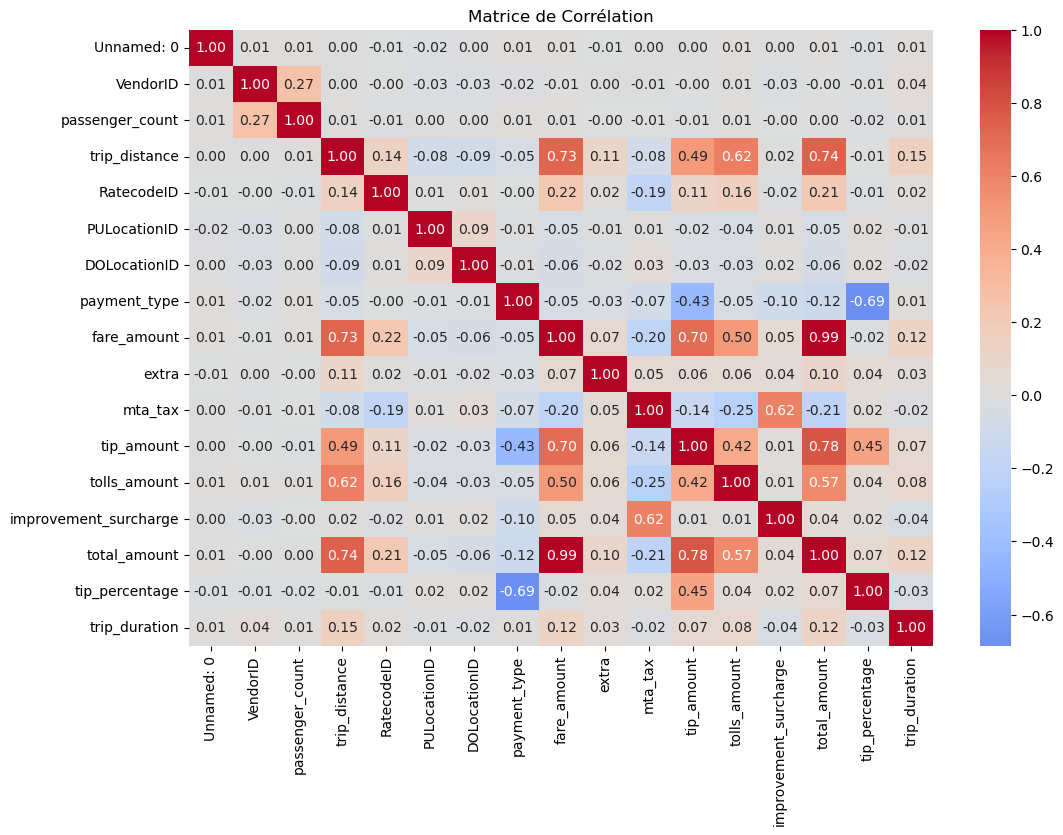

In [213]:
corr_matrix = datatrainset.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Matrice de Corr√©lation")
plt.show()



Objectif : Cette matrice montre les corr√©lations lin√©aires entre diff√©rentes variables avant l'application de SMOTE. Les couleurs aident √† visualiser la force et la direction de la corr√©lation (Rouge = positif, Bleu = n√©gatif, Blanc/Gris = proche de z√©ro).

Corr√©lations Fortes et Attendues (Rouge Fonc√©) :

Il y a une tr√®s forte corr√©lation positive (proche de 1) entre fare_amount (tarif) et total_amount (montant total), ce qui est logique.

Des corr√©lations positives fortes (environ 0.7) existent entre trip_distance (distance) et fare_amount/total_amount. Les trajets plus longs co√ªtent plus cher.

tip_amount (pourboire) est fortement corr√©l√© √† fare_amount (0.70) et total_amount (0.78). Les courses plus ch√®res re√ßoivent g√©n√©ralement des pourboires plus √©lev√©s.

tolls_amount (p√©ages) est mod√©r√©ment corr√©l√© √† trip_distance (0.62). Les trajets plus longs sont plus susceptibles d'avoir des p√©ages.

Corr√©lation N√©gative Notable (Bleu Fonc√©) :

Il y a une corr√©lation n√©gative mod√©r√©e √† forte (-0.69) entre payment_type (type de paiement) et tip_percentage (pourcentage de pourboire). Cela sugg√®re fortement qu'un type de paiement (probablement l'esp√®ce, souvent cod√© avec un nombre plus √©lev√© comme 2) est associ√© √† des pourcentages de pourboire beaucoup plus faibles (ou nuls) par rapport √† l'autre type (probablement la carte de cr√©dit, cod√©e comme 1).

Une corr√©lation n√©gative (-0.43) existe aussi entre payment_type et tip_amount (montant absolu du pourboire), pour la m√™me raison.

Corr√©lations Faibles : La plupart des autres paires de variables ont des corr√©lations faibles (proches de 0), indiquant une faible relation lin√©aire entre elles (ex: passenger_count avec la plupart des autres variables, PULocationID/DOLocationID avec les co√ªts, etc.).

En bref : La matrice confirme les relations logiques entre distance et co√ªts. Elle met en √©vidence un lien tr√®s fort entre le type de paiement et le comportement de pourboire. Beaucoup d'autres variables ne montrent pas de fortes relations lin√©aires entre elles.

# Pr√©-Traitement

## Nettoyage des colonnes inutiles

In [217]:
def nettoyage(df):
    cols_to_drop = ['extra', 'mta_tax','Unnamed: 0']
    df = df.drop(cols_to_drop, axis=1)
    df=df[
    (df["passenger_count"] != 0) &
    (df["trip_distance"] > 0) &
    (df["fare_amount"] > 0) &
    (df["total_amount"] > 0) &
    (df["pickup_minute"]>0)].copy()
    return df

- Variables constantes (store_and_fwd_flag = 100% de 'N')	Bruitent le mod√®le sans apporter d'information.	Supprimer.
- Outliers extr√™mes (fare_amount = -120)	Faussent les statistiques (moyenne, corr√©lations).	Nettoyer (ex: seuil fare_amount > 0).
- Colonnes redondantes (total_amount vs fare_amount + tip_amount)	Multicollin√©arit√© (d√©gradent la performance des mod√®les lin√©aires).	 Supprimer ou fusionner.

In [219]:
datatrainset.shape

(18159, 32)

In [220]:
datatrainset_clean=nettoyage(datatrainset)

In [221]:
datatrainset_clean.shape

(17693, 29)

## Encodage

In [229]:
datatrainset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17693 entries, 252 to 2732
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               17693 non-null  int64         
 1   tpep_pickup_datetime   17693 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  17693 non-null  datetime64[ns]
 3   passenger_count        17693 non-null  int64         
 4   trip_distance          17693 non-null  float64       
 5   RatecodeID             17693 non-null  int64         
 6   store_and_fwd_flag     17693 non-null  object        
 7   PULocationID           17693 non-null  int64         
 8   DOLocationID           17693 non-null  int64         
 9   payment_type           17693 non-null  int64         
 10  fare_amount            17693 non-null  float64       
 11  tip_amount             17693 non-null  float64       
 12  tolls_amount           17693 non-null  float64       
 13  impro

In [231]:
def encodage(df):
    code1 = {
        'Y': 1, 'N': 0,
        'night': 1, 'morning': 2, 'afternoon': 3, 'evening': 4,
        'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3,
        'Thursday': 4, 'Friday': 5, 'Saturday': 6,
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }

    # Appliquer l'encodage uniquement sur les colonnes object/text
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].map(code1)

    return df

In [233]:
datatrainset_clean=encodage(datatrainset_clean)

In [235]:
datatrainset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17693 entries, 252 to 2732
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               17693 non-null  int64         
 1   tpep_pickup_datetime   17693 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  17693 non-null  datetime64[ns]
 3   passenger_count        17693 non-null  int64         
 4   trip_distance          17693 non-null  float64       
 5   RatecodeID             17693 non-null  int64         
 6   store_and_fwd_flag     17693 non-null  int64         
 7   PULocationID           17693 non-null  int64         
 8   DOLocationID           17693 non-null  int64         
 9   payment_type           17693 non-null  int64         
 10  fare_amount            17693 non-null  float64       
 11  tip_amount             17693 non-null  float64       
 12  tolls_amount           17693 non-null  float64       
 13  impro

## FEATURE ENGINEERING

In [238]:
def FeatureEngineering(datatrainset_clean):
    datatrainset_clean['trip_duration'] = (datatrainset_clean['tpep_dropoff_datetime'] - datatrainset_clean['tpep_pickup_datetime']).dt.total_seconds() / 60
    datatrainset_clean['speed_mph'] = datatrainset_clean['trip_distance'] / (datatrainset_clean['trip_duration'] / 60)
    datatrainset_clean = datatrainset_clean[(datatrainset_clean['speed_mph'] > 0) & (datatrainset_clean['speed_mph'] < 100)]
    return datatrainset_clean
    

In [240]:
datatrainset_clean=FeatureEngineering(datatrainset_clean)

## FEATURE SCALING

In [243]:
numerical_cols = datatrainset_clean.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_cols)

Numerical columns: Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'tip_percentage', 'trip_duration', 'pickup_day_name',
       'pickup_month_name', 'time_of_day', 'speed_mph'],
      dtype='object')


## standardisation

In [246]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = datatrainset_clean.select_dtypes(include=['float', 'int']).columns
datatrainset_clean[numeric_columns] = scaler.fit_transform(datatrainset_clean[numeric_columns])
print(datatrainset_clean.head())

       VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
252        0.89  2017-04-16 23:08:31   2017-04-16 23:24:44            -0.51   
16220      0.89  2017-04-24 06:52:50   2017-04-24 06:55:51            -0.51   
9795      -1.12  2017-05-21 02:36:49   2017-05-21 02:42:24             0.27   
1972      -1.12  2017-01-09 16:38:25   2017-01-09 16:43:11            -0.51   
21092     -1.12  2017-06-19 18:45:25   2017-06-19 18:54:12            -0.51   

       trip_distance  RatecodeID  store_and_fwd_flag  PULocationID  \
252             0.84       -0.14               -0.07          1.00   
16220          -0.62       -0.14               -0.07          1.30   
9795           -0.42       -0.14               -0.07         -0.73   
1972           -0.66       -0.14               -0.07         -1.31   
21092          -0.53       -0.14               -0.07          0.01   

       DOLocationID  payment_type  ...  trip_duration  pickup_day  \
252            0.09          1.37  

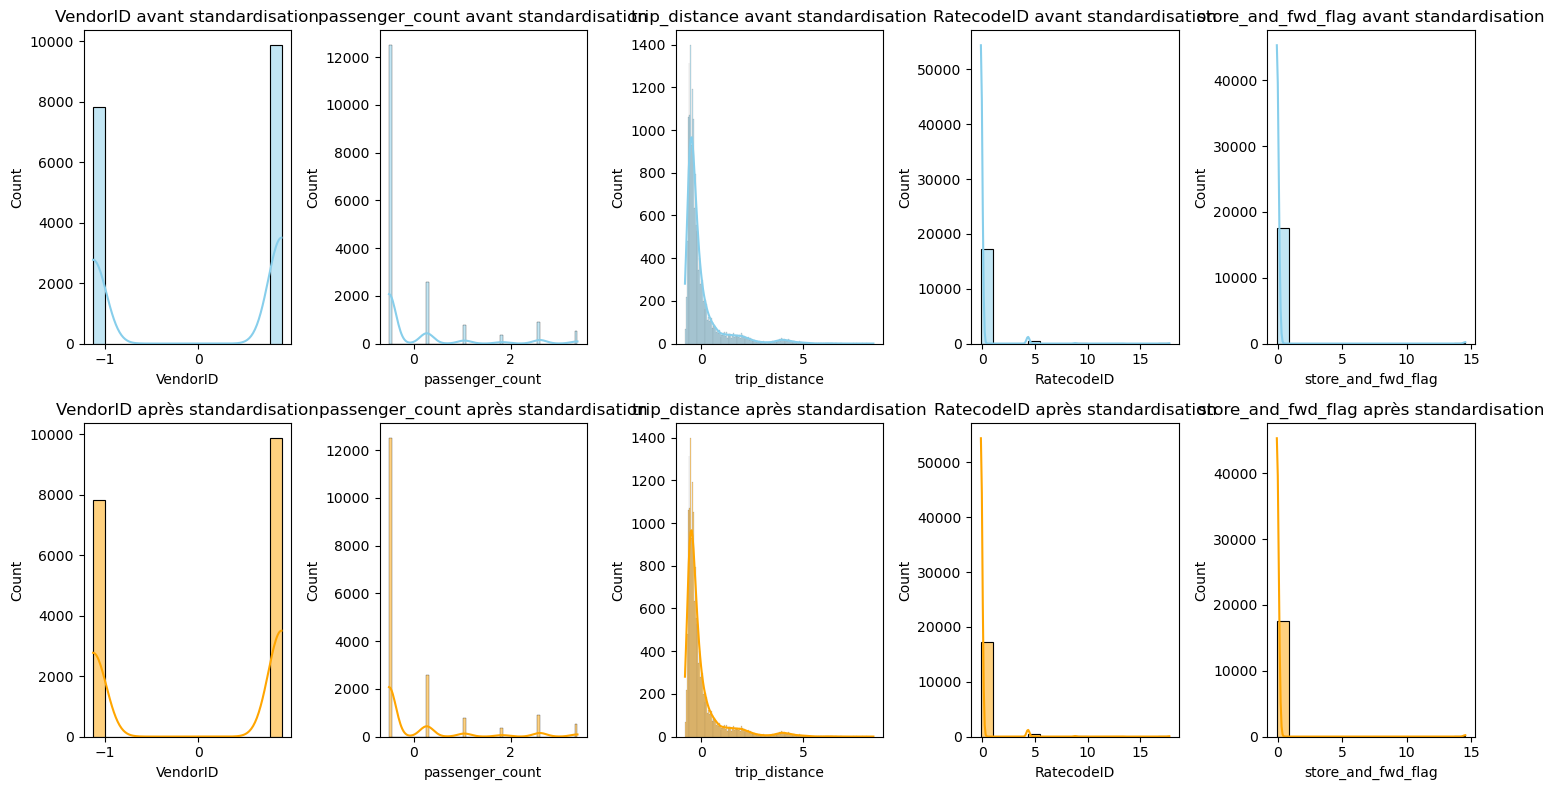

In [248]:
selected_columns = numeric_columns[:5]
fig, axes = plt.subplots(2, len(selected_columns), figsize=(15, 8))
for i, column in enumerate(selected_columns):
    sns.histplot(datatrainset_clean[column], kde=True, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'{column} avant standardisation')
    sns.histplot(datatrainset_clean[column], kde=True, ax=axes[1, i], color='orange')
    axes[1, i].set_title(f'{column} apr√®s standardisation')
plt.tight_layout()
plt.show()

# Interpr√©tation des distributions avant et apr√®s standardisation

Cette visualisation compare la distribution de cinq variables avant standardisation (en bleu, rang√©e sup√©rieure) et apr√®s standardisation (en orange, rang√©e inf√©rieure). Analysons chaque variable et l'impact de la standardisation.

## Analyse d√©taill√©e des variables

### 1. VendorID
- **Avant standardisation**: Distribution bimodale avec deux pics principaux autour de -1 et +1, sugg√©rant une variable cat√©gorielle (probablement deux fournisseurs principaux).
- **Apr√®s standardisation**: La forme bimodale est pr√©serv√©e, mais les valeurs sont maintenant normalis√©es.

### 2. passenger_count
- **Avant standardisation**: Distribution fortement asym√©trique avec un pic majeur pr√®s de 0, et plusieurs pics plus petits √† intervalles r√©guliers (1, 2, 3, etc.), correspondant au nombre de passagers.
- **Apr√®s standardisation**: Les m√™mes pics sont visibles mais avec des √©chelles normalis√©es.

### 3. trip_distance
- **Avant standardisation**: Distribution tr√®s asym√©trique avec la majorit√© des trajets √©tant courts (proche de 0), et une longue queue vers la droite repr√©sentant des trajets plus longs mais moins fr√©quents.
- **Apr√®s standardisation**: La forme g√©n√©rale est maintenue mais les valeurs sont normalis√©es.

### 4. RatecodeID
- **Avant standardisation**: Distribution avec un pic dominant pr√®s de 0 et quelques valeurs discr√®tes plus √©lev√©es, indiquant une variable cat√©gorielle.
- **Apr√®s standardisation**: Structure pr√©serv√©e mais normalis√©e.

### 5. store_and_fwd_flag
- **Avant standardisation**: Distribution binaire avec deux valeurs principales, sugg√©rant une variable bool√©enne (oui/non).
- **Apr√®s standardisation**: La structure binaire est conserv√©e mais les valeurs sont normalis√©es.

## Pourquoi standardiser?

La standardisation est justifi√©e pour plusieurs raisons importantes:

1. **Uniformisation des √©chelles**: Les variables originales ont des √©chelles tr√®s diff√©rentes (RatecodeID atteint 50 000+ en count vs trip_distance qui reste sous 1 400), ce qui peut biaiser les analyses multivari√©es comme l'ACP vue pr√©c√©demment.

2. **Am√©lioration des performances algorithmiques**: Plusieurs algorithmes d'apprentissage automatique et techniques statistiques (notamment l'ACP) sont sensibles √† l'√©chelle des variables. La standardisation permet d'√©viter que les variables √† grande √©chelle dominent l'analyse.

3. **Comparabilit√© des variables**: La standardisation permet de comparer directement l'influence relative des diff√©rentes variables, ind√©pendamment de leurs unit√©s d'origine.

4. **R√©duction de l'impact des valeurs extr√™mes**: Bien que la forme des distributions soit pr√©serv√©e, la standardisation peut att√©nuer l'influence des valeurs aberrantes dans certaines analyses.

5. **Convergence des algorithmes**: Pour les m√©thodes it√©ratives, la standardisation peut am√©liorer et acc√©l√©rer la convergence.

## Observations importantes

- La standardisation a pr√©serv√© la structure fondamentale des donn√©es (bimodalit√©, asym√©trie, nature cat√©gorielle), ce qui est souhaitable.
- Les distributions asym√©triques (notamment trip_distance) restent asym√©triques apr√®s standardisation, ce qui indique que la standardisation ne normalise pas la forme de la distribution mais seulement son √©chelle.
- Pour les variables cat√©gorielles comme VendorID ou RatecodeID, la standardisation ne change pas leur nature discr√®te mais facilite leur int√©gration dans des mod√®les multivari√©s.

Cette standardisation explique probablement pourquoi la premi√®re composante principale expliquait une si grande partie de la variance dans les graphiques d'ACP pr√©c√©dents - elle refl√®te l'homog√©n√©isation des √©chelles qui permet une meilleure comparaison entre variables.


## FEATURE SELECTION

Unique values in 'is_generous': [-0.98902395  1.01109786]
Target after conversion: [0 1]


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [25 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [25 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [25 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Use

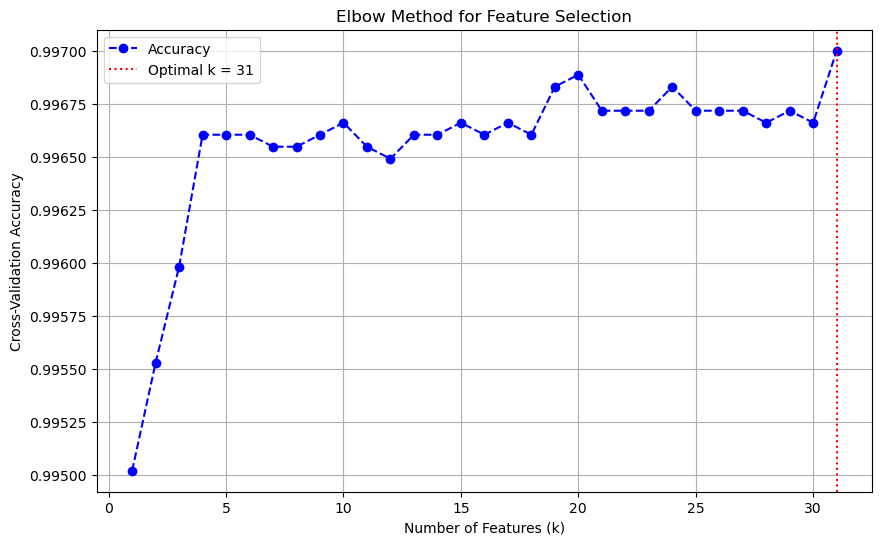

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [25 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw



Selected Features (31):
VendorID: F-score = 0.0040, Importance = nan%
passenger_count: F-score = 0.3818, Importance = nan%
trip_distance: F-score = 0.0048, Importance = nan%
RatecodeID: F-score = 3.8082, Importance = nan%
store_and_fwd_flag: F-score = 3.1321, Importance = nan%
PULocationID: F-score = 4.7584, Importance = nan%
DOLocationID: F-score = 4.9956, Importance = nan%
payment_type: F-score = 14707.3760, Importance = nan%
fare_amount: F-score = 1.0286, Importance = nan%
tip_amount: F-score = 6643.5225, Importance = nan%
tolls_amount: F-score = 24.8574, Importance = nan%
total_amount: F-score = 156.9050, Importance = nan%
tip_percentage: F-score = 39608.4178, Importance = nan%
pickup_hour: F-score = 12.6342, Importance = nan%
pickup_minute: F-score = 0.3234, Importance = nan%
pickup_second: F-score = 0.2478, Importance = nan%
trip_duration: F-score = 10.1041, Importance = nan%
pickup_day: F-score = 0.6584, Importance = nan%
pickup_dayofweek: F-score = 13.4619, Importance = nan%
p

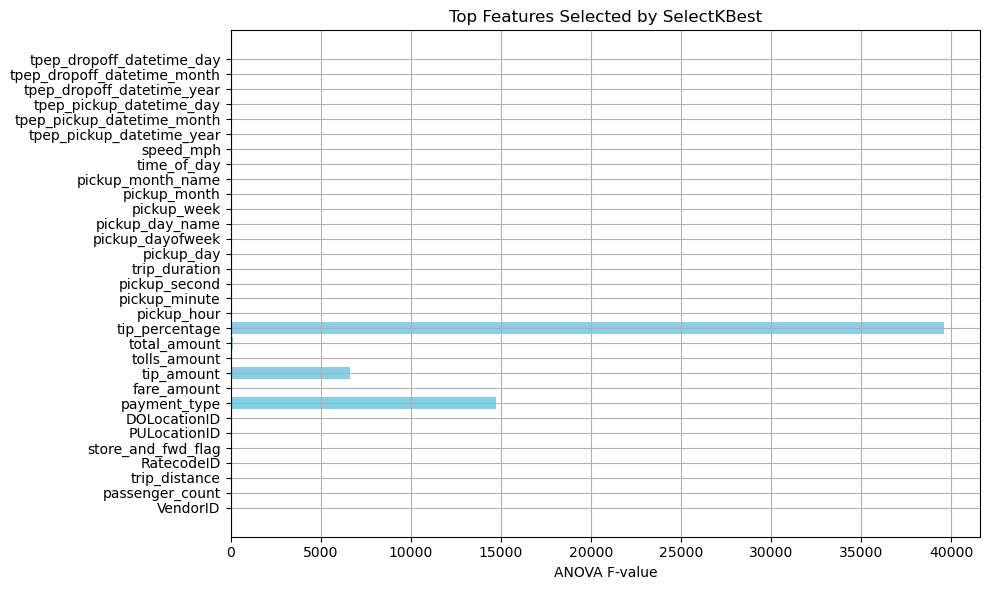

In [251]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X = datatrainset_clean.drop(columns=['is_generous']).copy()
y = datatrainset_clean['is_generous'].copy()
print(f"Unique values in 'is_generous': {y.unique()}")
if y.dtype != 'int' and y.dtype != 'bool':
    y = (y > 0.5).astype(int)
print(f"Target after conversion: {y.unique()}")
X = X.loc[:, X.nunique() > 1]
X = X.dropna()
y = y.loc[X.index]
for col in X.select_dtypes(include=['datetime', 'datetimetz']).columns:
    X[col + '_year'] = X[col].dt.year
    X[col + '_month'] = X[col].dt.month
    X[col + '_day'] = X[col].dt.day
    X.drop(columns=col, inplace=True)

if X.shape[1] == 0:
    raise ValueError("Aucune variable explicative valide apr√®s le pr√©traitement.")

# S√©lection de variables (m√©thode du coude)
scores = []
k_range = range(1, X.shape[1] + 1)
for k in k_range:
    selector = SelectKBest(f_classif, k=k)
    X_selected = selector.fit_transform(X, y)
    cv_scores = cross_val_score(LogisticRegression(max_iter=1000), X_selected, y, cv=5, scoring='accuracy')
    scores.append(cv_scores.mean())

# Visualisation Elbow
optimal_k = k_range[scores.index(max(scores))]
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o', linestyle='--', color='b', label='Accuracy')
plt.axvline(optimal_k, color='red', linestyle=':', label=f'Optimal k = {optimal_k}')
plt.title('Elbow Method for Feature Selection')
plt.xlabel('Number of Features (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# S√©lection finale des variables
selector = SelectKBest(f_classif, k=optimal_k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Importance relative
total_score = sum(feature_scores)
importance_percentages = [(s / total_score) * 100 for s in feature_scores]

print(f'\nSelected Features ({optimal_k}):')
for feat, score, percent in zip(selected_features, feature_scores, importance_percentages):
    print(f"{feat}: F-score = {score:.4f}, Importance = {percent:.2f}%")

# Visualisation des F-scores
plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_scores, color='skyblue')
plt.xlabel('ANOVA F-value')
plt.title('Top Features Selected by SelectKBest')
plt.grid(True)
plt.tight_layout()
plt.show()


In [252]:
from sklearn.decomposition import PCA
numerical_cols = datatrainset_clean.select_dtypes(include=[np.number])
acp = PCA()
acp.fit(numerical_cols)

# Obtenir le ratio de variance expliqu√©e
explained_variance_ratio = acp.explained_variance_ratio_

# Calculer la variance expliqu√©e cumul√©e
cumulative_variance = explained_variance_ratio.cumsum()

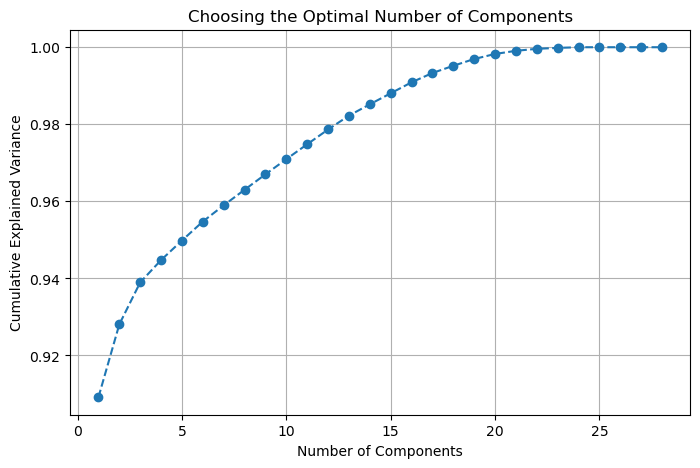

In [253]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Choosing the Optimal Number of Components')
plt.grid()
plt.show()

Variance expliqu√©e par chaque composante principale :
[0.90917156 0.01891864]
Variance expliqu√©e cumul√©e :
[0.90917156 0.9280902 ]


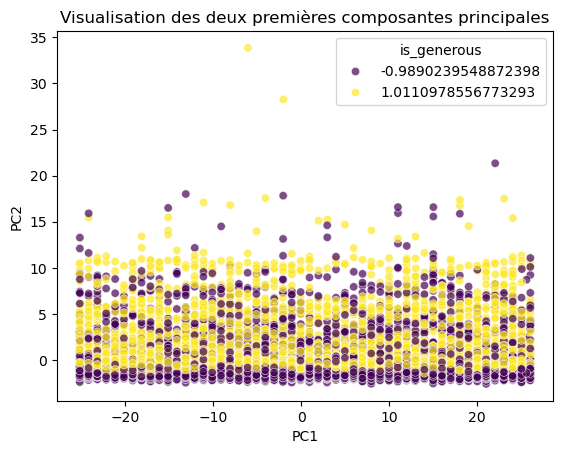

In [254]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# S√©lectionner uniquement les variables num√©riques de datatrainset_clean
X = datatrainset_clean.select_dtypes(include=[np.number])  # Variables num√©riques

# D√©finir la variable cible (is_generous)
y = datatrainset_clean['is_generous']  # Variable cible

# Appliquer l'ACP uniquement sur les variables num√©riques
pca = PCA(n_components=2)  # R√©duction √† 2 dimensions pour la visualisation
X_pca = pca.fit_transform(X)  # Utilisation des features sp√©cifi√©es dans X

# Cr√©er un DataFrame pour les r√©sultats de l'ACP
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Ajout de la variable cible pour colorier selon les classes
pca_df['is_generous'] = y.values  # On ajoute la variable cible √† pca_df

# Affichage de la variance expliqu√©e par chaque composante
print("Variance expliqu√©e par chaque composante principale :")
print(pca.explained_variance_ratio_)

# Affichage du cumul de la variance expliqu√©e
print("Variance expliqu√©e cumul√©e :")
print(np.cumsum(pca.explained_variance_ratio_))

# Visualisation des deux premi√®res composantes principales
sns.scatterplot(x='PC1', y='PC2', hue='is_generous', data=pca_df, palette='viridis', alpha=0.7)
plt.title('Visualisation des deux premi√®res composantes principales')
plt.show()


Ce graphique montre la projection des donn√©es sur les deux premi√®res composantes principales (PC1 et PC2). Les points sont color√©s selon la variable "is_generous" avec des valeurs n√©gatives (-0.989) en violet et positives (1.011) en jaune.
Observations d√©taill√©es:

La majorit√© des points sont concentr√©s dans la partie inf√©rieure du graphique (PC2 < 10), formant une distribution relativement dense et uniforme.
Il existe une l√©g√®re dispersion sur l'axe PC1 (entre -25 et +25 environ).
Quelques points isol√©s se trouvent dans la partie sup√©rieure du graphique, notamment autour de PC2 = 35, ce qui sugg√®re des valeurs atypiques.
Il ne semble pas y avoir de s√©paration claire entre les points jaunes et violets, ce qui indique que la variable "is_generous" n'est pas bien discrimin√©e par les deux premi√®res composantes principales.
La distribution semble assez homog√®ne horizontalement, ce qui sugg√®re que PC1 ne capture pas bien les diff√©rences li√©es √† la g√©n√©rosit√©.


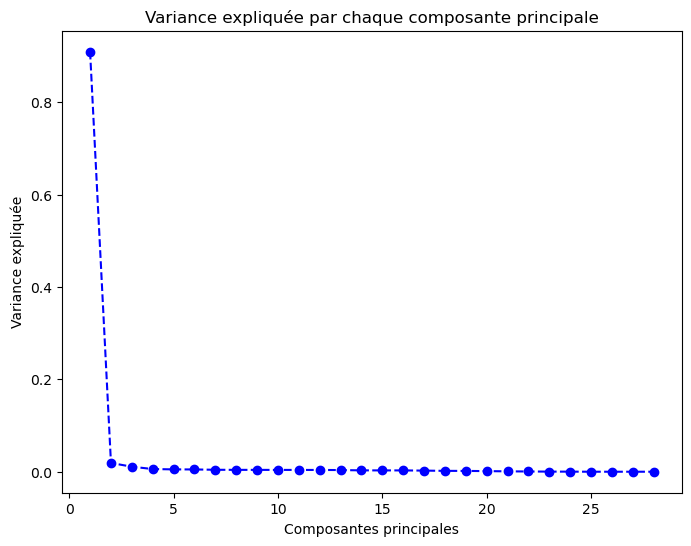

In [257]:
# Appliquer l'ACP sur toutes les variables num√©riques
pca = PCA()  # Appliquer l'ACP sans sp√©cifier n_components
pca.fit(X)  # Appliquer l'ACP sur les donn√©es

# Affichage de la variance expliqu√©e par chaque composante
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--', color='b')
plt.title("Variance expliqu√©e par chaque composante principale")
plt.xlabel("Composantes principales")
plt.ylabel("Variance expliqu√©e")
plt.show()


Ce graphique montre la contribution individuelle de chaque composante principale √† la variance totale des donn√©es.
Observations d√©taill√©es:

La premi√®re composante principale (PC1) explique environ 90% de la variance totale, ce qui est extr√™mement significatif.
Les composantes suivantes (PC2 √† PC28) ont des contributions individuelles tr√®s faibles, toutes inf√©rieures √† 5%.
La courbe pr√©sente une chute brutale entre PC1 et PC2, puis devient presque plate, ce qui indique une structure de donn√©es fortement domin√©e par une seule dimension.
Cette distribution sugg√®re qu'une grande partie de l'information dans les donn√©es peut √™tre captur√©e par la premi√®re composante principale seule.


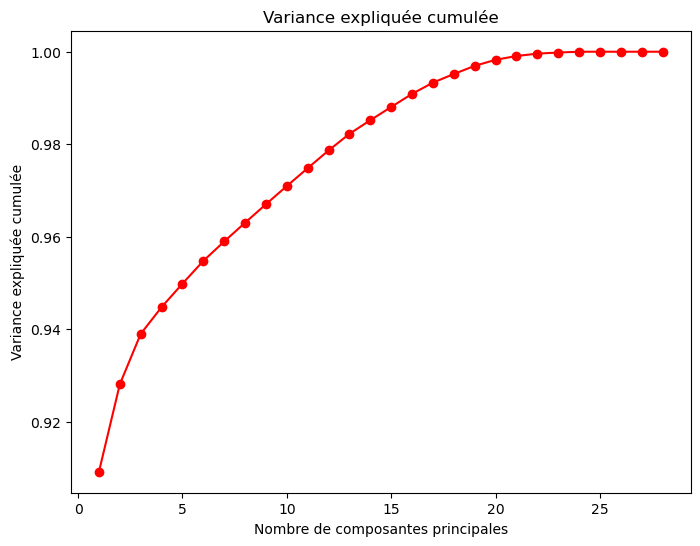

In [264]:
# Affichage de la variance expliqu√©e cumul√©e
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', color='r')
plt.title("Variance expliqu√©e cumul√©e")
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliqu√©e cumul√©e")
plt.show()


Ce graphique montre la proportion cumulative de variance expliqu√©e en fonction du nombre de composantes principales retenues.
Observations d√©taill√©es:

La premi√®re composante principale explique environ 91% de la variance totale.
Avec les 5 premi√®res composantes, on atteint environ 95% de la variance expliqu√©e.
√Ä partir de 20 composantes, la courbe atteint presque 100% de variance expliqu√©e et se stabilise.
La croissance de la courbe est rapide au d√©but puis s'aplatit progressivement, ce qui est typique des analyses en composantes principales.
Pour obtenir 99% de la variance expliqu√©e, il semble n√©cessaire de conserver environ 15 composantes.


La structure des donn√©es est fortement domin√©e par une seule dimension (PC1), qui capture la majorit√© de la variance.
La variable "is_generous" ne semble pas √™tre bien repr√©sent√©e par les deux premi√®res composantes principales, comme le montre le m√©lange des points jaunes et violets.
Malgr√© la dominance de PC1, il faut consid√©rer plusieurs composantes (environ 15-20) pour capturer presque toute la variabilit√© des donn√©es.
Les outliers visibles dans le premier graphique pourraient m√©riter une investigation plus approfondie pour comprendre leur nature.
La r√©duction dimensionnelle semble efficace, mais n√©cessite probablement plus que les deux premi√®res composantes pour pr√©server les caract√©ristiques importantes des donn√©es, notamment celles li√©es √† la variable "is_generous".


In [268]:
# cette fonction dessine le cercle de correlation .
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # d√©termination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des fl√®ches
            # s'il y a plus de 30 fl√®ches, on n'affiche pas le triangle √† leur extr√©mit√©
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:],
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))

            # affichage des noms des variables
            if labels is not None:
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)

            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # d√©finition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqu√©
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corr√©lations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

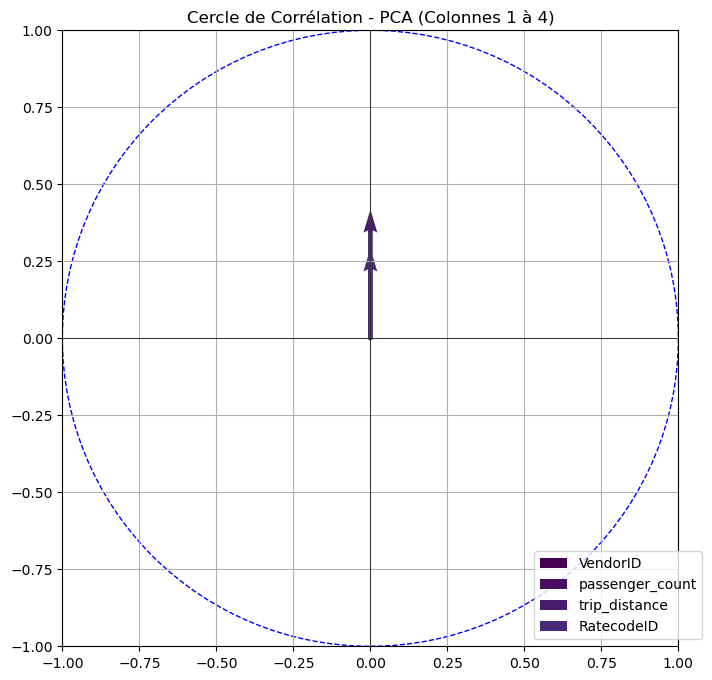

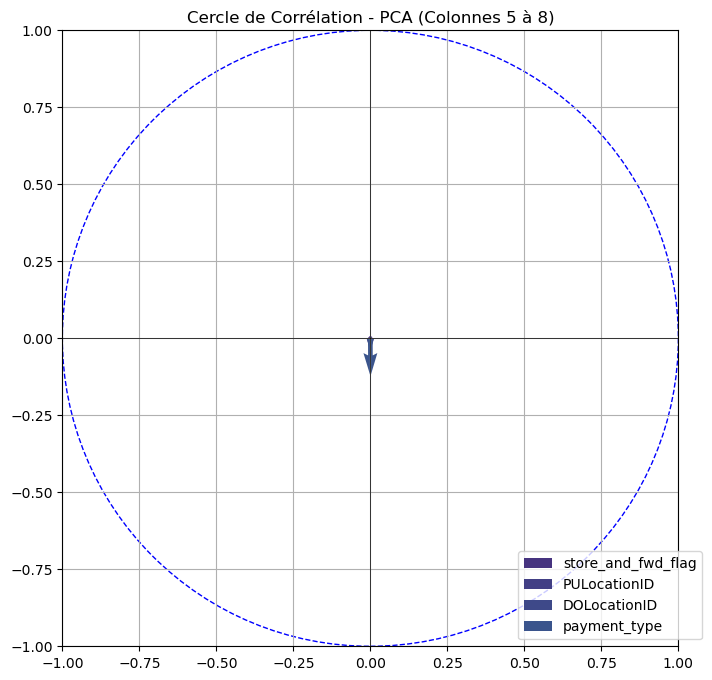

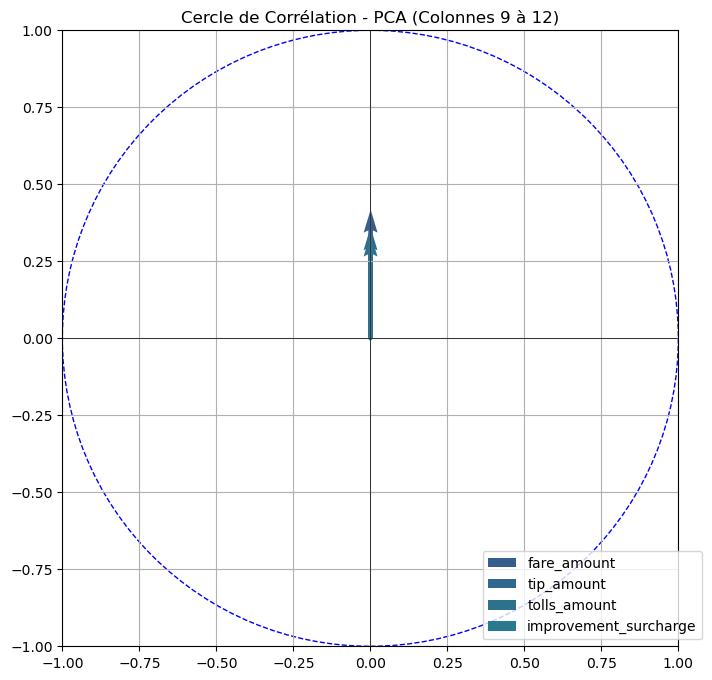

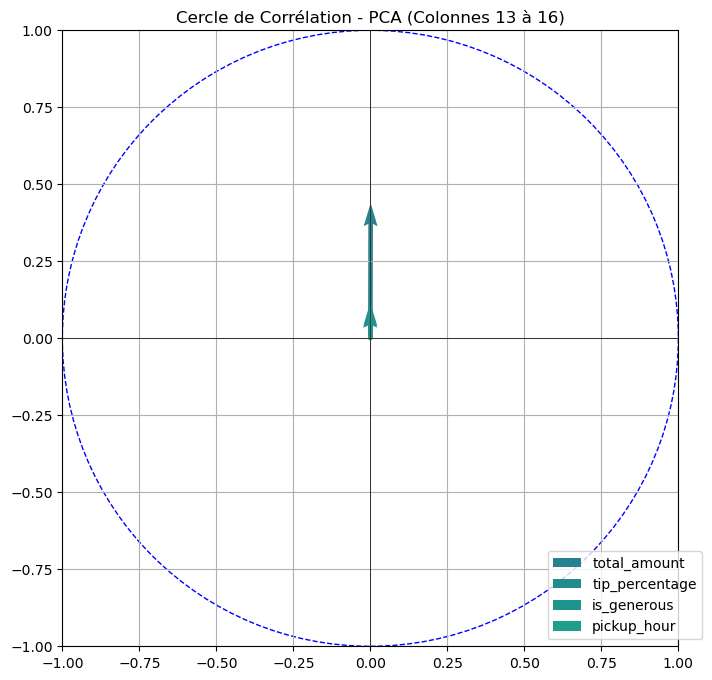

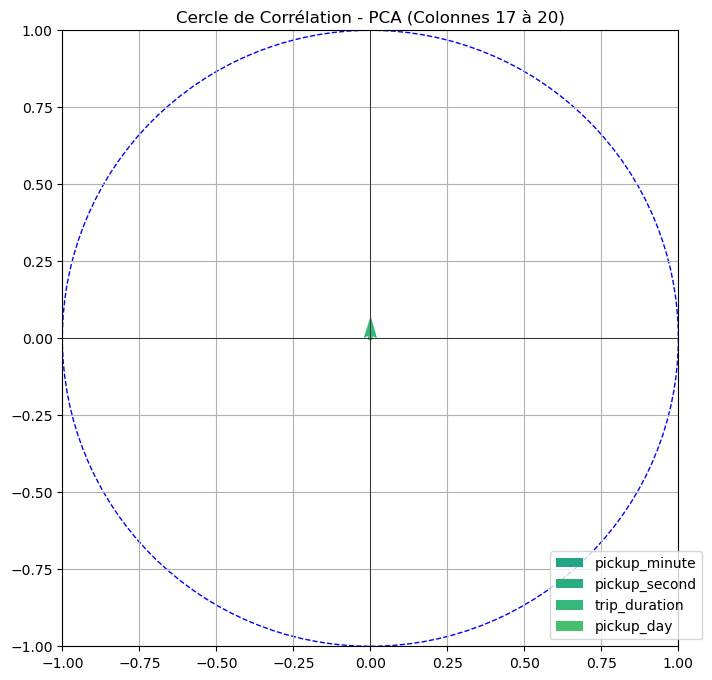

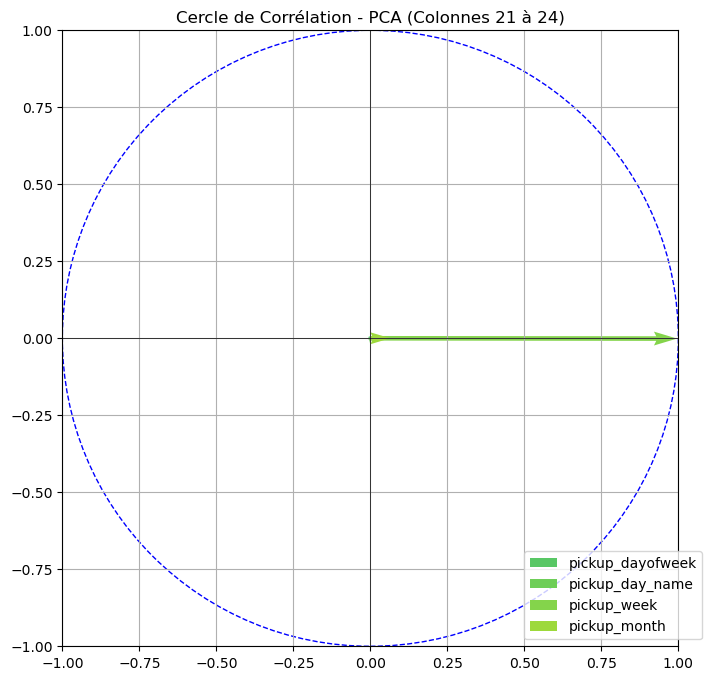

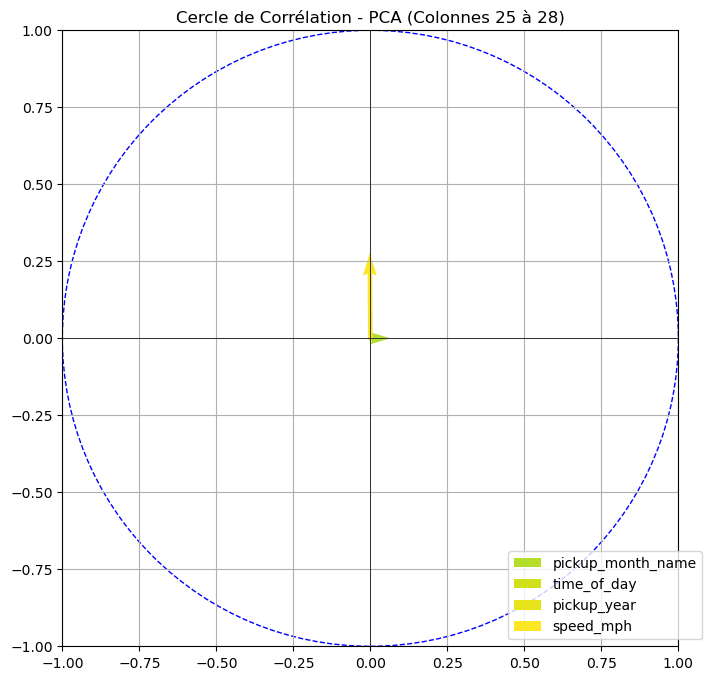

In [270]:
import matplotlib.cm as cm  # Import the colormap module

composantes = acp.components_

def afficher_circles(pca, df, batch_size=4):
    num_features = df.shape[1]
    colors = cm.viridis(np.linspace(0, 1, num_features))  # Use a colormap for colors
    for i in range(0, num_features, batch_size):
        plt.figure(figsize=(8, 8))
        circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', linewidth=1)
        plt.gca().add_artist(circle)

        for j in range(i, min(i + batch_size, num_features)):
            plt.quiver(0, 0, composantes[0, j], composantes[1, j], angles='xy', scale_units='xy', scale=1,
                       label=df.columns[j], color=colors[j])

        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)

        plt.legend(loc='lower right', bbox_to_anchor=(1.05, 0))  # Move legend to the bottom-right
        plt.title(f'Cercle de Corr√©lation - PCA (Colonnes {i+1} √† {min(i+batch_size, num_features)})')
        plt.gca().set_aspect('equal', adjustable='box')

        plt.grid(True)
        plt.show()

afficher_circles(acp, numerical_cols, batch_size=4)


Variance expliqu√©e par chaque composante principale :
[0.90917156 0.01891864]
Variance expliqu√©e cumul√©e :
[0.90917156 0.9280902 ]

Contributions des features √† la composante PC1 (en pourcentage) :
pickup_week             86.96
pickup_month_name        5.64
pickup_month             5.64
pickup_day               0.40
speed_mph                0.17
pickup_dayofweek         0.12
pickup_day_name          0.10
PULocationID             0.10
store_and_fwd_flag       0.10
trip_duration            0.10
fare_amount              0.09
total_amount             0.09
is_generous              0.07
tolls_amount             0.07
tip_amount               0.07
VendorID                 0.06
time_of_day              0.05
pickup_minute            0.04
payment_type             0.03
pickup_hour              0.03
tip_percentage           0.03
trip_distance            0.02
DOLocationID             0.01
RatecodeID               0.01
pickup_second            0.01
passenger_count          0.00
improvement_surcha

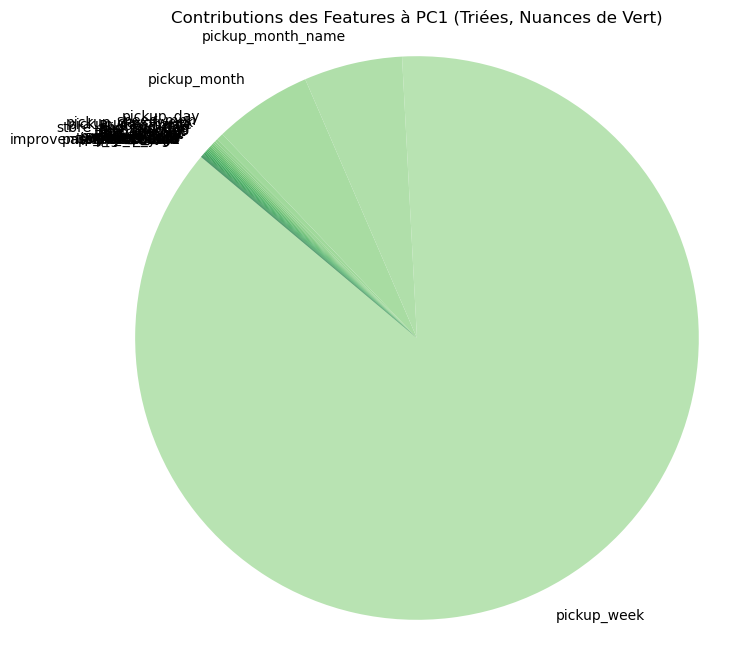

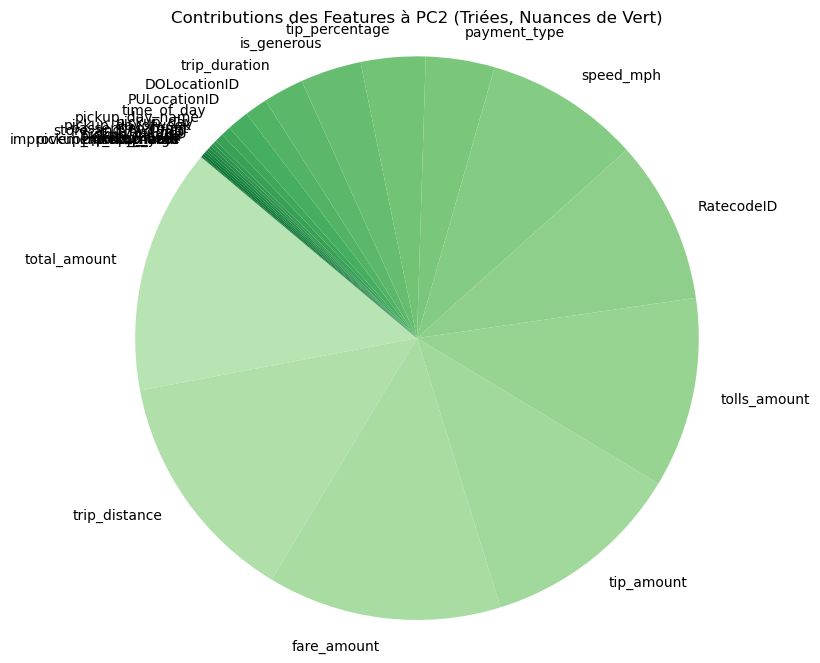

In [271]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# S√©lectionner uniquement les variables num√©riques de datatrainset_clean
X = datatrainset_clean.select_dtypes(include=[np.number])  # Variables num√©riques

# D√©finir la variable cible (is_generous)
y = datatrainset_clean['is_generous']  # Variable cible

# Appliquer l'ACP uniquement sur les variables num√©riques
acp = PCA(n_components=2)  # R√©duction √† 2 dimensions pour la visualisation
X_pca = acp.fit_transform(X)  # Utilisation des features sp√©cifi√©es dans X

# Cr√©er un DataFrame pour les r√©sultats de l'ACP
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Ajout de la variable cible pour colorier selon les classes
pca_df['is_generous'] = y.values  # On ajoute la variable cible √† pca_df

# Affichage de la variance expliqu√©e par chaque composante
print("Variance expliqu√©e par chaque composante principale :")
print(acp.explained_variance_ratio_)

# Affichage du cumul de la variance expliqu√©e
print("Variance expliqu√©e cumul√©e :")
print(np.cumsum(acp.explained_variance_ratio_))

# Afficher les contributions des features dans chaque composante principale
numerical_cols = X  # Variables num√©riques pour les labels des features

# Calculer les "loadings" (contributions des features dans chaque composante)
loadings = pd.DataFrame(acp.components_, columns=numerical_cols.columns, index=[f'PC{i+1}' for i in range(acp.n_components_)])

# Convertir les "loadings" en pourcentage pour une meilleure interpr√©tation
pc1_loadings = loadings.loc["PC1"]
pc2_loadings = loadings.loc["PC2"]

# Convertir en valeurs absolues et normaliser pour obtenir les pourcentages
pc1_percent = (np.abs(pc1_loadings) / np.abs(pc1_loadings).sum()) * 100
pc2_percent = (np.abs(pc2_loadings) / np.abs(pc2_loadings).sum()) * 100

# Afficher les contributions des features en pourcentage pour chaque composante
print("\nContributions des features √† la composante PC1 (en pourcentage) :")
print(pc1_percent.sort_values(ascending=False))

print("\nContributions des features √† la composante PC2 (en pourcentage) :")
print(pc2_percent.sort_values(ascending=False))

# Trier les valeurs de la plus grande √† la plus petite
pc1_percent = pc1_percent.sort_values(ascending=False)
pc2_percent = pc2_percent.sort_values(ascending=False)

# G√©n√©rer des nuances de vert pour les graphiques circulaires
def generate_green_shades(n):
    return plt.cm.Greens(np.linspace(0.3, 1, n))  # Ajuster 0.3 pour contr√¥ler la nuance la plus claire

# Fonction pour tracer un graphique en camembert tri√© avec des nuances de vert (sans pourcentages)
def plot_pie_chart(data, title):
    colors = generate_green_shades(len(data))  # G√©n√©rer n nuances de vert
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, startangle=140, colors=colors)  # Retirer autopct
    plt.title(title)
    plt.axis('equal')  # Un rapport √©gal garantit que le graphique est circulaire
    plt.show()

# Tracer les graphiques en camembert tri√©s avec des nuances de vert (sans pourcentages)
plot_pie_chart(pc1_percent, "Contributions des Features √† PC1 (Tri√©es, Nuances de Vert)")
plot_pie_chart(pc2_percent, "Contributions des Features √† PC2 (Tri√©es, Nuances de Vert)")


In [272]:
# fonction pour afficher les composantes principales
def plot_var_explique (acp):
    var_explique = acp.explained_variance_ratio_
    plt.bar(np.arange(len(var_explique ))+1, var_explique )
    plt.plot(np.arange(len(var_explique ))+1, var_explique .cumsum(),c="red",marker='o')
    plt.xlabel("la rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title(" Eboulis des valeurs propres")
    plt.show(block=False)

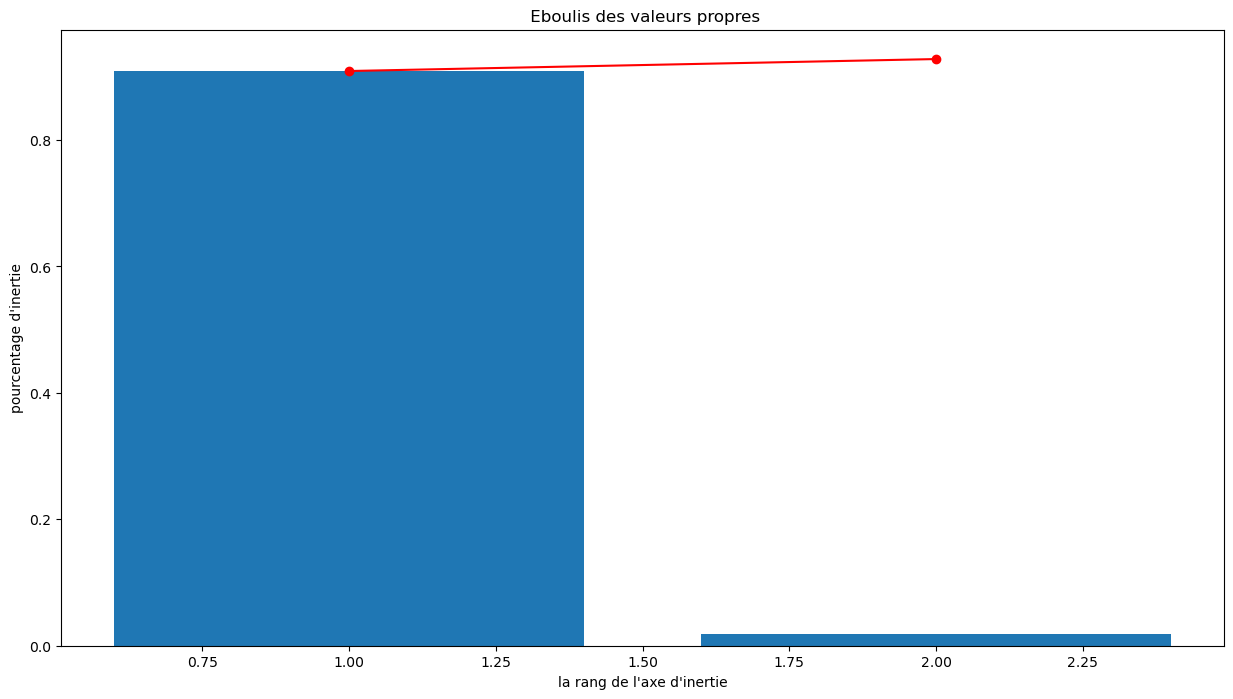

In [273]:
plt.figure( figsize = ( 15, 8))
plot_var_explique (acp)

# Modellisation

In [279]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, classification_report, confusion_matrix,
                            ConfusionMatrixDisplay, roc_auc_score)
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, classification_report, confusion_matrix,
                            ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay)
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, classification_report, confusion_matrix,
                            ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay)
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, classification_report, confusion_matrix,
                            ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay)
from sklearn.inspection import DecisionBoundaryDisplay

## les variable eu peut utilis√© 

In [282]:
features = ['pickup_week', 'pickup_month', 'fare_amount',
            'trip_distance', 'RatecodeID', 'payment_type', 'speed_mph','PULocationID','DOLocationID']

## algorithme Support vectuer machine (SVM)

In [285]:
X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = svm.SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
model.fit(X_train, y_train)


SVC(probability=True)

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë       M√âTRIQUES DU MOD√àLE    ‚ïë
‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£
‚ïë Accuracy: 0.8293             ‚ïë
‚ïë Precision: 0.7423            ‚ïë
‚ïë Recall: 1.0000               ‚ïë
‚ïë F1-score: 0.8521             ‚ïë
‚ïë ROC AUC: 0.8346              ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù

Classification Report d√©taill√©:
              precision    recall  f1-score   support

           0       1.00      0.66      0.80      2694
           1       0.74      1.00      0.85      2607

    accuracy                           0.83      5301
   macro avg       0.87      0.83      0.83      5301
weighted avg       0.87      0.83      0.82      5301



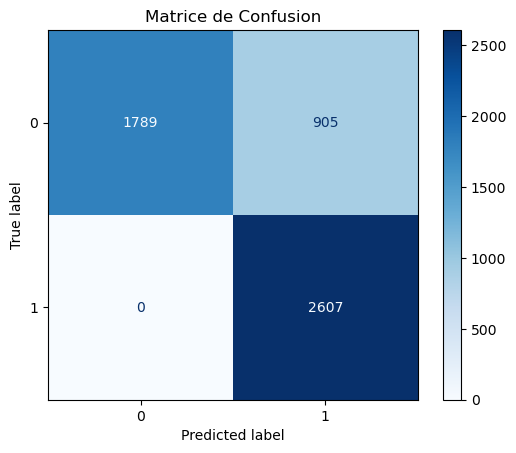

In [287]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilit√©s pour la classe positive

# Calcul des m√©triques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des m√©triques avec une mise en forme claire
print("‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó")
print("‚ïë       M√âTRIQUES DU MOD√àLE    ‚ïë")
print("‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£")
print(f"‚ïë Accuracy: {accuracy:.4f}             ‚ïë")
print(f"‚ïë Precision: {precision:.4f}            ‚ïë")
print(f"‚ïë Recall: {recall:.4f}               ‚ïë")
print(f"‚ïë F1-score: {f1:.4f}             ‚ïë")
print(f"‚ïë ROC AUC: {roc_auc:.4f}              ‚ïë")
print("‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù")

print("\nClassification Report d√©taill√©:")
print(classification_report(y_test, y_pred))


# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion")
plt.show()


In [288]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
params_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(SVC(probability=True), params_svm, cv=5, scoring='f1')
grid_svm.fit(X_train, y_train)

print("SVM - Meilleurs param√®tres :", grid_svm.best_params_)
best_svm = grid_svm.best_estimator_

KeyboardInterrupt: 

In [290]:
X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = svm.SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
model.fit(X_train, y_train)


SVC(probability=True)

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë       M√âTRIQUES DU MOD√àLE    ‚ïë
‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£
‚ïë Accuracy: 0.8293             ‚ïë
‚ïë Precision: 0.7423            ‚ïë
‚ïë Recall: 1.0000               ‚ïë
‚ïë F1-score: 0.8521             ‚ïë
‚ïë ROC AUC: 0.8346              ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù

Classification Report d√©taill√©:
              precision    recall  f1-score   support

           0       1.00      0.66      0.80      2694
           1       0.74      1.00      0.85      2607

    accuracy                           0.83      5301
   macro avg       0.87      0.83      0.83      5301
weighted avg       0.87      0.83      0.82      5301



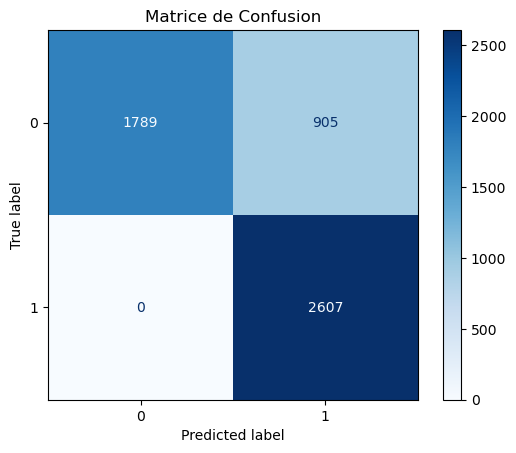

In [291]:
### y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilit√©s pour la classe positive

# Calcul des m√©triques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des m√©triques avec une mise en forme claire
print("‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó")
print("‚ïë       M√âTRIQUES DU MOD√àLE    ‚ïë")
print("‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£")
print(f"‚ïë Accuracy: {accuracy:.4f}             ‚ïë")
print(f"‚ïë Precision: {precision:.4f}            ‚ïë")
print(f"‚ïë Recall: {recall:.4f}               ‚ïë")
print(f"‚ïë F1-score: {f1:.4f}             ‚ïë")
print(f"‚ïë ROC AUC: {roc_auc:.4f}              ‚ïë")
print("‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù")
print("\nClassification Report d√©taill√©:")
print(classification_report(y_test, y_pred))


# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion")
plt.show()


## reseaux de neurone

In [295]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Pr√©paration des donn√©es
X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)

# 2. Split des donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. R√©seau de neurones
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)
model.fit(X_train, y_train)


MLPClassifier(max_iter=300, random_state=42)

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë M√âTRIQUES DU R√âSEAU DE NEURONES    ‚ïë
‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£
‚ïë Accuracy: 0.8283                   ‚ïë
‚ïë Precision: 0.7425                  ‚ïë
‚ïë Recall: 0.9965                     ‚ïë
‚ïë F1-score: 0.8510                   ‚ïë
‚ïë ROC AUC: 0.8438                    ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù

Classification Report d√©taill√©:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80      2694
           1       0.74      1.00      0.85      2607

    accuracy                           0.83      5301
   macro avg       0.87      0.83      0.82      5301
weighted avg       0.87      0.83      0.82      5301



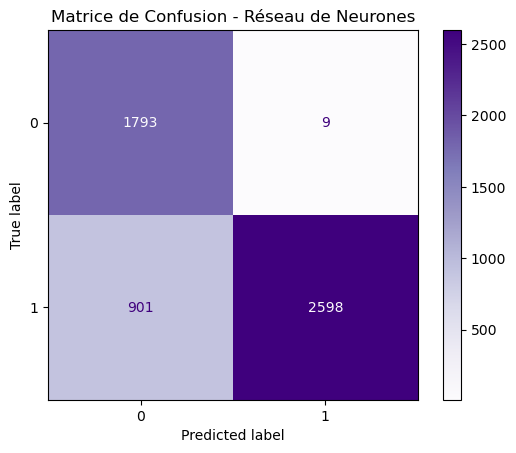

In [297]:
# 4. Pr√©diction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 5. √âvaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des m√©triques
print("‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó")
print("‚ïë M√âTRIQUES DU R√âSEAU DE NEURONES    ‚ïë")
print("‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£")
print(f"‚ïë Accuracy: {accuracy:.4f}                   ‚ïë")
print(f"‚ïë Precision: {precision:.4f}                  ‚ïë")
print(f"‚ïë Recall: {recall:.4f}                     ‚ïë")
print(f"‚ïë F1-score: {f1:.4f}                   ‚ïë")
print(f"‚ïë ROC AUC: {roc_auc:.4f}                    ‚ïë")
print("‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù")

print("\nClassification Report d√©taill√©:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_pred,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title("Matrice de Confusion - R√©seau de Neurones")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
params_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'max_iter': [200, 300]
}
grid_mlp = GridSearchCV(MLPClassifier(random_state=42), params_mlp, cv=5, scoring='f1')
grid_mlp.fit(X_train, y_train)
print("Meilleurs hyperparam√®tres MLP:", grid_mlp.best_params_)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Pr√©paration des donn√©es
X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)

# 2. Split des donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. R√©seau de neurones
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)
model.fit(X_train, y_train)


In [ ]:
# 4. Pr√©diction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 5. √âvaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des m√©triques
print("‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó")
print("‚ïë M√âTRIQUES DU R√âSEAU DE NEURONES    ‚ïë")
print("‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£")
print(f"‚ïë Accuracy: {accuracy:.4f}                   ‚ïë")
print(f"‚ïë Precision: {precision:.4f}                  ‚ïë")
print(f"‚ïë Recall: {recall:.4f}                     ‚ïë")
print(f"‚ïë F1-score: {f1:.4f}                   ‚ïë")
print(f"‚ïë ROC AUC: {roc_auc:.4f}                    ‚ïë")
print("‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù")

print("\nClassification Report d√©taill√©:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title("Matrice de Confusion - R√©seau de Neurones")
plt.show()

## algorithme Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 1. Pr√©paration des donn√©es
X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)

# 2. Split des donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Mod√®le Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [ ]:

# 4. Pr√©diction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 5. √âvaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage
print("‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó")
print("‚ïë M√âTRIQUES DU MOD√àLE RANDOM FOREST  ‚ïë")
print("‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£")
print(f"‚ïë Accuracy: {accuracy:.4f}                   ‚ïë")
print(f"‚ïë Precision: {precision:.4f}                  ‚ïë")
print(f"‚ïë Recall: {recall:.4f}                     ‚ïë")
print(f"‚ïë F1-score: {f1:.4f}                   ‚ïë")
print(f"‚ïë ROC AUC: {roc_auc:.4f}                    ‚ïë")
print("‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù")

print("\nClassification Report d√©taill√©:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title("Matrice de Confusion - Random Forest")
plt.show()


In [ ]:
params_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), params_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)
print("Meilleurs hyperparam√®tres RF:", grid_rf.best_params_)

In [ ]:

# 1. Pr√©paration des donn√©es
X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)

# 2. Split des donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Mod√®le Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [ ]:

# 4. Pr√©diction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 5. √âvaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage
print("‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó")
print("‚ïë M√âTRIQUES DU MOD√àLE RANDOM FOREST  ‚ïë")
print("‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£")
print(f"‚ïë Accuracy: {accuracy:.4f}                   ‚ïë")
print(f"‚ïë Precision: {precision:.4f}                  ‚ïë")
print(f"‚ïë Recall: {recall:.4f}                     ‚ïë")
print(f"‚ïë F1-score: {f1:.4f}                   ‚ïë")
print(f"‚ïë ROC AUC: {roc_auc:.4f}                    ‚ïë")
print("‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù")

print("\nClassification Report d√©taill√©:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title("Matrice de Confusion - Random Forest")
plt.show()


## algorithme KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Pr√©paration des donn√©es
X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)

# 2. Split des donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Mod√®le KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)


In [ ]:
# 4. Pr√©diction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 5. √âvaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage
print("‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó")
print("‚ïë     M√âTRIQUES DU MOD√àLE KNN  ‚ïë")
print("‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£")
print(f"‚ïë Accuracy: {accuracy:.4f}             ‚ïë")
print(f"‚ïë Precision: {precision:.4f}            ‚ïë")
print(f"‚ïë Recall: {recall:.4f}               ‚ïë")
print(f"‚ïë F1-score: {f1:.4f}             ‚ïë")
print(f"‚ïë ROC AUC: {roc_auc:.4f}              ‚ïë")
print("‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù")

print("\nClassification Report d√©taill√©:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges')
plt.title("Matrice de Confusion - KNN")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

params_knn = {'n_neighbors': [3, 5, 7, 9 , 11 , 13 , 15 , 19 ]}
grid_knn = GridSearchCV(KNeighborsClassifier(), params_knn, cv=5, scoring='f1')
grid_knn.fit(X_train, y_train)
print("Meilleur K pour KNN:", grid_knn.best_params_)

In [ ]:
# 1. Pr√©paration des donn√©es
X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)

# 2. Split des donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Mod√®le KNN
model = KNeighborsClassifier(n_neighbors=19)
model.fit(X_train, y_train)


In [ ]:
# 4. Pr√©diction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 5. √âvaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage
print("‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó")
print("‚ïë     M√âTRIQUES DU MOD√àLE KNN  ‚ïë")
print("‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£")
print(f"‚ïë Accuracy: {accuracy:.4f}             ‚ïë")
print(f"‚ïë Precision: {precision:.4f}            ‚ïë")
print(f"‚ïë Recall: {recall:.4f}               ‚ïë")
print(f"‚ïë F1-score: {f1:.4f}             ‚ïë")
print(f"‚ïë ROC AUC: {roc_auc:.4f}              ‚ïë")
print("‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù")

print("\nClassification Report d√©taill√©:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges')
plt.title("Matrice de Confusion - KNN")
plt.show()

# algorithme R√©gression logistique 

In [ ]:

X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)  # Conversion en entier

# 2. Split des donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Cr√©ation et entra√Ænement du mod√®le (version corrig√©e)
model = LogisticRegression(max_iter=1000, penalty=None, solver='lbfgs')  # penalty=None au lieu de 'none'
model.fit(X_train, y_train)


## √âvaluation et m√©triques

In [ ]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilit√©s pour la classe positive

# Calcul des m√©triques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des m√©triques
print("‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó")
print("‚ïë       M√âTRIQUES DU MOD√àLE    ‚ïë")
print("‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£")
print(f"‚ïë Accuracy: {accuracy:.4f}             ‚ïë")
print(f"‚ïë Precision: {precision:.4f}            ‚ïë")
print(f"‚ïë Recall: {recall:.4f}               ‚ïë")
print(f"‚ïë F1-score: {f1:.4f}             ‚ïë")
print(f"‚ïë ROC AUC: {roc_auc:.4f}              ‚ïë")
print("‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù")

print("\nClassification Report d√©taill√©:")
print(classification_report(y_test, y_pred))

# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion - R√©gression Logistique")
plt.show()

# 6. Visualisation avec PCA (reste identique)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))


In [ ]:
params_log = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_log = GridSearchCV(LogisticRegression(max_iter=1000), params_log, cv=5, scoring='f1')
grid_log.fit(X_train,¬†y_train)

In [ ]:

X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)  # Conversion en entier

# 2. Split des donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Cr√©ation et entra√Ænement du mod√®le (version corrig√©e)
model = LogisticRegression(max_iter=1000, penalty=None, solver='lbfgs')  # penalty=None au lieu de 'none'
model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilit√©s pour la classe positive

# Calcul des m√©triques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des m√©triques
print("‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó")
print("‚ïë       M√âTRIQUES DU MOD√àLE    ‚ïë")
print("‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£")
print(f"‚ïë Accuracy: {accuracy:.4f}             ‚ïë")
print(f"‚ïë Precision: {precision:.4f}            ‚ïë")
print(f"‚ïë Recall: {recall:.4f}               ‚ïë")
print(f"‚ïë F1-score: {f1:.4f}             ‚ïë")
print(f"‚ïë ROC AUC: {roc_auc:.4f}              ‚ïë")
print("‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù")

print("\nClassification Report d√©taill√©:")
print(classification_report(y_test, y_pred))

# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion - R√©gression Logistique")
plt.show()

# 6. Visualisation avec PCA (reste identique)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))


## algorithme Arbre de d√©cision

In [ ]:

X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)

# 2. Split des donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Cr√©ation et entra√Ænement du mod√®le
model = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=20,
    criterion='gini',
    random_state=42
)
model.fit(X_train, y_train)

## √âvaluation et m√©triques

In [ ]:

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Calcul des m√©triques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des m√©triques
print("‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó")
print("‚ïë       M√âTRIQUES DU MOD√àLE    ‚ïë")
print("‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£")
print(f"‚ïë Accuracy: {accuracy:.4f}             ‚ïë")
print(f"‚ïë Precision: {precision:.4f}            ‚ïë")
print(f"‚ïë Recall: {recall:.4f}               ‚ïë")
print(f"‚ïë F1-score: {f1:.4f}             ‚ïë")
print(f"‚ïë ROC AUC: {roc_auc:.4f}              ‚ïë")
print("‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù")

print("\nClassification Report d√©taill√©:")
print(classification_report(y_test, y_pred))

# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion - Arbre de D√©cision")
plt.show()

# 6. Visualisation de l'arbre (version texte)
tree_rules = export_text(model, feature_names=features)
print("\nStructure de l'arbre (version texte):")
print(tree_rules)

# 7. Visualisation graphique de l'arbre
plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=features,
          class_names=['Non G√©n√©reux', 'G√©n√©reux'],
          filled=True,
          rounded=True,
          proportion=True)
plt.title("Structure de l'arbre de d√©cision")
plt.show()

# 8. Importance des features
plt.figure(figsize=(10, 5))
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot.barh(color='skyblue')
plt.title('Importance des variables')
plt.xlabel('Score d\'importance')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()



In [ ]:
from sklearn.tree import DecisionTreeClassifier

params_tree = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), params_tree, cv=5, scoring='f1')
grid_tree.fit(X_train, y_train)

print("Arbre de D√©cision - Meilleurs param√®tres :", grid_tree.best_params_)
best_tree = grid_tree.best_estimator_

In [ ]:

X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)

# 2. Split des donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Cr√©ation et entra√Ænement du mod√®le
model = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=2,
    criterion='entropy',
    random_state=42
)
model.fit(X_train, y_train)

In [ ]:

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Calcul des m√©triques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des m√©triques
print("‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó")
print("‚ïë       M√âTRIQUES DU MOD√àLE    ‚ïë")
print("‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£")
print(f"‚ïë Accuracy: {accuracy:.4f}             ‚ïë")
print(f"‚ïë Precision: {precision:.4f}            ‚ïë")
print(f"‚ïë Recall: {recall:.4f}               ‚ïë")
print(f"‚ïë F1-score: {f1:.4f}             ‚ïë")
print(f"‚ïë ROC AUC: {roc_auc:.4f}              ‚ïë")
print("‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù")

print("\nClassification Report d√©taill√©:")
print(classification_report(y_test, y_pred))

# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion - Arbre de D√©cision")
plt.show()

# 6. Visualisation de l'arbre (version texte)
tree_rules = export_text(model, feature_names=features)
print("\nStructure de l'arbre (version texte):")
print(tree_rules)

# 7. Visualisation graphique de l'arbre
plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=features,
          class_names=['Non G√©n√©reux', 'G√©n√©reux'],
          filled=True,
          rounded=True,
          proportion=True)
plt.title("Structure de l'arbre de d√©cision")
plt.show()

# 8. Importance des features
plt.figure(figsize=(10, 5))
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot.barh(color='skyblue')
plt.title('Importance des variables')
plt.xlabel('Score d\'importance')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()



## algorithme de GaussianNB

In [ ]:

X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)

# 2. Split des donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Cr√©ation et entra√Ænement du mod√®le
model = GaussianNB()
model.fit(X_train, y_train)



## √âvaluation et m√©triques

In [ ]:
# 4. √âvaluation et m√©triques
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Calcul des m√©triques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des m√©triques
print("‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó")
print("‚ïë       M√âTRIQUES DU MOD√àLE    ‚ïë")
print("‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£")
print(f"‚ïë Accuracy: {accuracy:.4f}             ‚ïë")
print(f"‚ïë Precision: {precision:.4f}            ‚ïë")
print(f"‚ïë Recall: {recall:.4f}               ‚ïë")
print(f"‚ïë F1-score: {f1:.4f}             ‚ïë")
print(f"‚ïë ROC AUC: {roc_auc:.4f}              ‚ïë")
print("‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù")

print("\nClassification Report d√©taill√©:")
print(classification_report(y_test, y_pred))

# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion - Bayes Na√Øf")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

params_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), params_knn, cv=5, scoring='f1')
grid_knn.fit(X_train, y_train)
print("Meilleur K pour KNN:", grid_knn.best_params_)

In [ ]:

X = datatrainset_clean[features]
y = datatrainset_clean['is_generous'].astype(int)

# 2. Split des donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Cr√©ation et entra√Ænement du mod√®le
model = GaussianNB()
model.fit(X_train, y_train)



In [ ]:
# 4. √âvaluation et m√©triques
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Calcul des m√©triques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des m√©triques
print("‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó")
print("‚ïë       M√âTRIQUES DU MOD√àLE    ‚ïë")
print("‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£")
print(f"‚ïë Accuracy: {accuracy:.4f}             ‚ïë")
print(f"‚ïë Precision: {precision:.4f}            ‚ïë")
print(f"‚ïë Recall: {recall:.4f}               ‚ïë")
print(f"‚ïë F1-score: {f1:.4f}             ‚ïë")
print(f"‚ïë ROC AUC: {roc_auc:.4f}              ‚ïë")
print("‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù")

print("\nClassification Report d√©taill√©:")
print(classification_report(y_test, y_pred))

# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion - Bayes Na√Øf")
plt.show()

# Test

## Tr√©-Traitement des donnes de test

In [ ]:
datatestset=extrairedetime(datatestset)
datatestset_clean=nettoyage(datatestset)
datatestset_clean=encodage(datatestset_clean)
datatestset_clean=FeatureEngineering(datatrainset_clean)
numerical_cols = datatestset_clean.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_cols)
scaler = StandardScaler()
numeric_columns = datatestset_clean.select_dtypes(include=['float', 'int']).columns
datatestset_clean[numeric_columns] = scaler.transform(datatestset_clean[numeric_columns])
print(datatestset_clean.head())

In [206]:
features = ['pickup_week', 'pickup_month', 'fare_amount',
            'trip_distance', 'RatecodeID', 'payment_type', 'speed_mph']

In [209]:
X = datatestset_clean[features]
y = datatestset_clean['is_generous'].astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [211]:
model = svm.SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
model.fit(X_train, y_train)

SVC(probability=True)

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë       M√âTRIQUES DU MOD√àLE    ‚ïë
‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£
‚ïë Accuracy: 0.7755             ‚ïë
‚ïë Precision: 0.6867            ‚ïë
‚ïë Recall: 1.0000               ‚ïë
‚ïë F1-score: 0.8143             ‚ïë
‚ïë ROC AUC: 0.7744              ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù

Classification Report d√©taill√©:
              precision    recall  f1-score   support

           0       1.00      0.56      0.72       706
           1       0.69      1.00      0.81       684

    accuracy                           0.78      1390
   macro avg       0.84      0.78      0.77      1390
weighted avg       0.85      0.78      0.76      1390



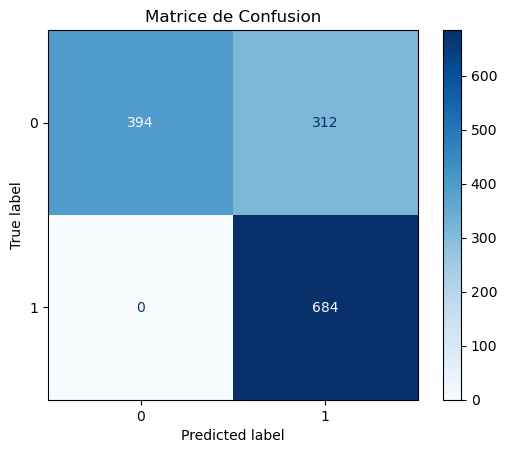

In [212]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilit√©s pour la classe positive

# Calcul des m√©triques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des m√©triques avec une mise en forme claire
print("‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó")
print("‚ïë       M√âTRIQUES DU MOD√àLE    ‚ïë")
print("‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£")
print(f"‚ïë Accuracy: {accuracy:.4f}             ‚ïë")
print(f"‚ïë Precision: {precision:.4f}            ‚ïë")
print(f"‚ïë Recall: {recall:.4f}               ‚ïë")
print(f"‚ïë F1-score: {f1:.4f}             ‚ïë")
print(f"‚ïë ROC AUC: {roc_auc:.4f}              ‚ïë")
print("‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù")

print("\nClassification Report d√©taill√©:")
print(classification_report(y_test, y_pred))


# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion")
plt.show()

In [213]:

X = datatestset_clean[features]
y = datatestset_clean['is_generous'].astype(int)  # Conversion en entier

# 2. Split des donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Cr√©ation et entra√Ænement du mod√®le (version corrig√©e)
model = LogisticRegression(max_iter=1000, penalty=None, solver='lbfgs')  # penalty=None au lieu de 'none'
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, penalty=None)

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë       M√âTRIQUES DU MOD√àLE    ‚ïë
‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£
‚ïë Accuracy: 0.7763             ‚ïë
‚ïë Precision: 0.6874            ‚ïë
‚ïë Recall: 1.0000               ‚ïë
‚ïë F1-score: 0.8148             ‚ïë
‚ïë ROC AUC: 0.7751              ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù

Classification Report d√©taill√©:
              precision    recall  f1-score   support

           0       1.00      0.56      0.72       706
           1       0.69      1.00      0.81       684

    accuracy                           0.78      1390
   macro avg       0.84      0.78      0.77      1390
weighted avg       0.85      0.78      0.77      1390



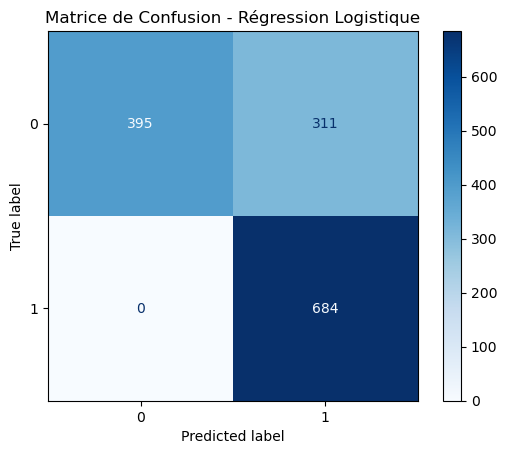

In [215]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilit√©s pour la classe positive

# Calcul des m√©triques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des m√©triques
print("‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó")
print("‚ïë       M√âTRIQUES DU MOD√àLE    ‚ïë")
print("‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£")
print(f"‚ïë Accuracy: {accuracy:.4f}             ‚ïë")
print(f"‚ïë Precision: {precision:.4f}            ‚ïë")
print(f"‚ïë Recall: {recall:.4f}               ‚ïë")
print(f"‚ïë F1-score: {f1:.4f}             ‚ïë")
print(f"‚ïë ROC AUC: {roc_auc:.4f}              ‚ïë")
print("‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù")

print("\nClassification Report d√©taill√©:")
print(classification_report(y_test, y_pred))

# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion - R√©gression Logistique")
plt.show()



In [218]:
X = datatestset_clean[features]
y = datatestset_clean['is_generous'].astype(int)

# 2. Split des donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Cr√©ation et entra√Ænement du mod√®le
model = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=20,
    criterion='gini',
    random_state=42
)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=20, random_state=42)

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë       M√âTRIQUES DU MOD√àLE    ‚ïë
‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£
‚ïë Accuracy: 0.7719             ‚ïë
‚ïë Precision: 0.6863            ‚ïë
‚ïë Recall: 0.9883               ‚ïë
‚ïë F1-score: 0.8101             ‚ïë
‚ïë ROC AUC: 0.7757              ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù

Classification Report d√©taill√©:
              precision    recall  f1-score   support

           0       0.98      0.56      0.71       706
           1       0.69      0.99      0.81       684

    accuracy                           0.77      1390
   macro avg       0.83      0.78      0.76      1390
weighted avg       0.84      0.77      0.76      1390



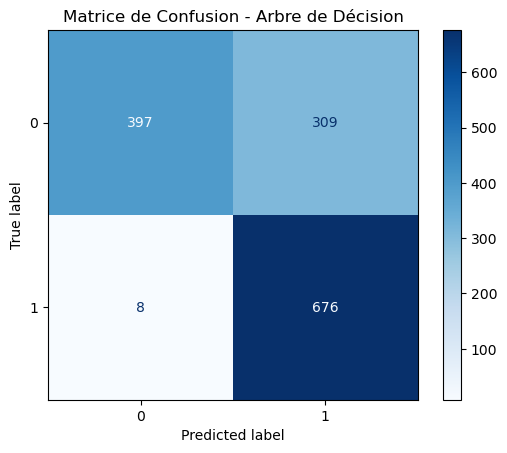


Structure de l'arbre (version texte):
|--- payment_type <= 0.35
|   |--- trip_distance <= 1.59
|   |   |--- trip_distance <= 1.56
|   |   |   |--- class: 1
|   |   |--- trip_distance >  1.56
|   |   |   |--- class: 0
|   |--- trip_distance >  1.59
|   |   |--- RatecodeID <= 11.06
|   |   |   |--- class: 1
|   |   |--- RatecodeID >  11.06
|   |   |   |--- class: 0
|--- payment_type >  0.35
|   |--- class: 0



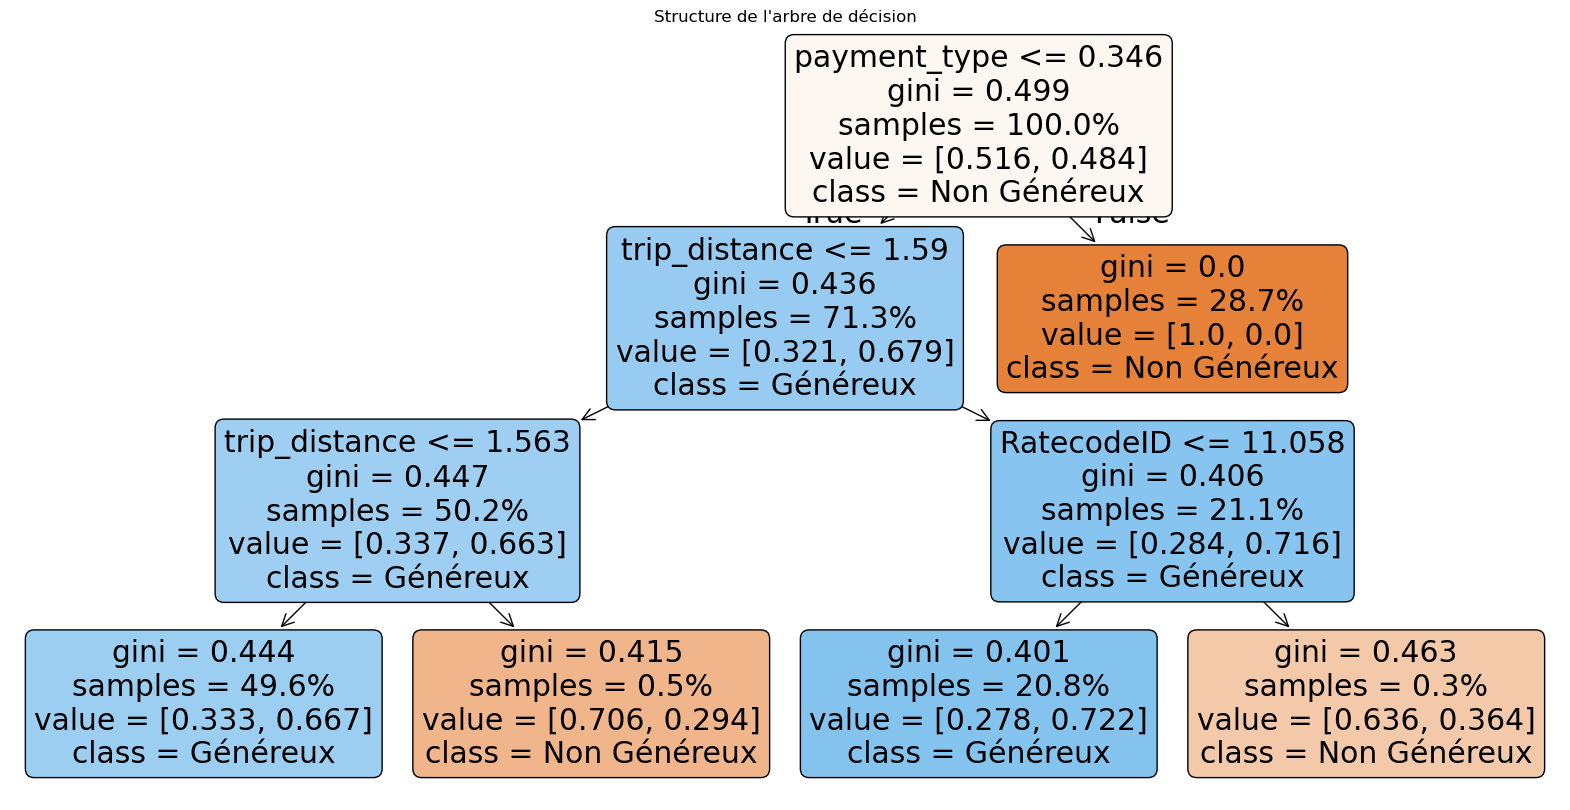

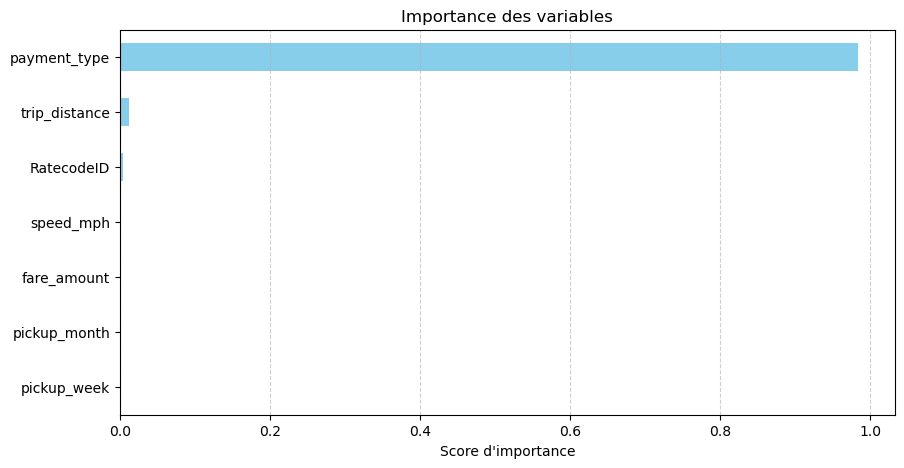

In [221]:

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Calcul des m√©triques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des m√©triques
print("‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó")
print("‚ïë       M√âTRIQUES DU MOD√àLE    ‚ïë")
print("‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£")
print(f"‚ïë Accuracy: {accuracy:.4f}             ‚ïë")
print(f"‚ïë Precision: {precision:.4f}            ‚ïë")
print(f"‚ïë Recall: {recall:.4f}               ‚ïë")
print(f"‚ïë F1-score: {f1:.4f}             ‚ïë")
print(f"‚ïë ROC AUC: {roc_auc:.4f}              ‚ïë")
print("‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù")

print("\nClassification Report d√©taill√©:")
print(classification_report(y_test, y_pred))

# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion - Arbre de D√©cision")
plt.show()

# 6. Visualisation de l'arbre (version texte)
tree_rules = export_text(model, feature_names=features)
print("\nStructure de l'arbre (version texte):")
print(tree_rules)

# 7. Visualisation graphique de l'arbre
plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=features,
          class_names=['Non G√©n√©reux', 'G√©n√©reux'],
          filled=True,
          rounded=True,
          proportion=True)
plt.title("Structure de l'arbre de d√©cision")
plt.show()

# 8. Importance des features
plt.figure(figsize=(10, 5))
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot.barh(color='skyblue')
plt.title('Importance des variables')
plt.xlabel('Score d\'importance')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [222]:
X = datatestset_clean[features]
y = datatestset_clean['is_generous'].astype(int)

# 2. Split des donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Cr√©ation et entra√Ænement du mod√®le
model = GaussianNB()
model.fit(X_train, y_train)



GaussianNB()

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë       M√âTRIQUES DU MOD√àLE    ‚ïë
‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£
‚ïë Accuracy: 0.7763             ‚ïë
‚ïë Precision: 0.6874            ‚ïë
‚ïë Recall: 1.0000               ‚ïë
‚ïë F1-score: 0.8148             ‚ïë
‚ïë ROC AUC: 0.7875              ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù

Classification Report d√©taill√©:
              precision    recall  f1-score   support

           0       1.00      0.56      0.72       706
           1       0.69      1.00      0.81       684

    accuracy                           0.78      1390
   macro avg       0.84      0.78      0.77      1390
weighted avg       0.85      0.78      0.77      1390



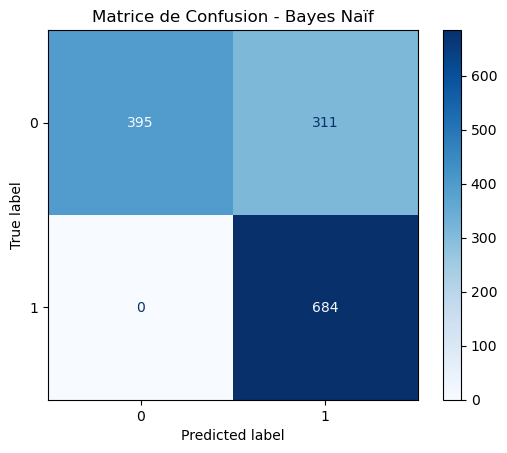

In [223]:
# 4. √âvaluation et m√©triques
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Calcul des m√©triques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des m√©triques
print("‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó")
print("‚ïë       M√âTRIQUES DU MOD√àLE    ‚ïë")
print("‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£")
print(f"‚ïë Accuracy: {accuracy:.4f}             ‚ïë")
print(f"‚ïë Precision: {precision:.4f}            ‚ïë")
print(f"‚ïë Recall: {recall:.4f}               ‚ïë")
print(f"‚ïë F1-score: {f1:.4f}             ‚ïë")
print(f"‚ïë ROC AUC: {roc_auc:.4f}              ‚ïë")
print("‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù")

print("\nClassification Report d√©taill√©:")
print(classification_report(y_test, y_pred))

# 5. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion - Bayes Na√Øf")
plt.show()

## algorithme KNN

In [297]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Pr√©paration des donn√©es
X = datatestset_clean[features]
y = datatestset_clean['is_generous'].astype(int)

# 2. Split des donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Mod√®le KNN
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë     M√âTRIQUES DU MOD√àLE KNN  ‚ïë
‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£
‚ïë Accuracy: 0.7353             ‚ïë
‚ïë Precision: 0.6804            ‚ïë
‚ïë Recall: 0.8713               ‚ïë
‚ïë F1-score: 0.7641             ‚ïë
‚ïë ROC AUC: 0.7677              ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù

Classification Report d√©taill√©:
              precision    recall  f1-score   support

           0       0.83      0.60      0.70       706
           1       0.68      0.87      0.76       684

    accuracy                           0.74      1390
   macro avg       0.75      0.74      0.73      1390
weighted avg       0.76      0.74      0.73      1390



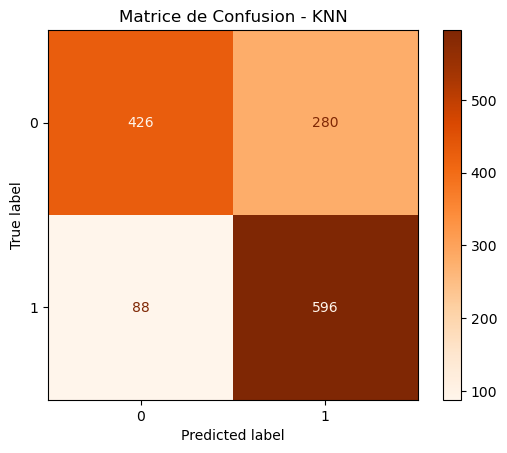

In [299]:

# 4. Pr√©diction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 5. √âvaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage
print("‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó")
print("‚ïë     M√âTRIQUES DU MOD√àLE KNN  ‚ïë")
print("‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£")
print(f"‚ïë Accuracy: {accuracy:.4f}             ‚ïë")
print(f"‚ïë Precision: {precision:.4f}            ‚ïë")
print(f"‚ïë Recall: {recall:.4f}               ‚ïë")
print(f"‚ïë F1-score: {f1:.4f}             ‚ïë")
print(f"‚ïë ROC AUC: {roc_auc:.4f}              ‚ïë")
print("‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù")

print("\nClassification Report d√©taill√©:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges')
plt.title("Matrice de Confusion - KNN")
plt.show()


In [301]:
from sklearn.model_selection import GridSearchCV

params_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), params_knn, cv=5, scoring='f1')
grid_knn.fit(X_train, y_train)
print("Meilleur K pour KNN:", grid_knn.best_params_)

Meilleur K pour KNN: {'n_neighbors': 9}


## algorithme Random Forest

In [235]:
from sklearn.ensemble import RandomForestClassifier

# 1. Pr√©paration des donn√©es
X = datatestset_clean[features]
y = datatestset_clean['is_generous'].astype(int)

# 2. Split des donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Mod√®le Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë M√âTRIQUES DU MOD√àLE RANDOM FOREST  ‚ïë
‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£
‚ïë Accuracy: 0.7468                   ‚ïë
‚ïë Precision: 0.6921                  ‚ïë
‚ïë Recall: 0.8743                     ‚ïë
‚ïë F1-score: 0.7726                   ‚ïë
‚ïë ROC AUC: 0.7794                    ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù

Classification Report d√©taill√©:
              precision    recall  f1-score   support

           0       0.84      0.62      0.71       706
           1       0.69      0.87      0.77       684

    accuracy                           0.75      1390
   macro avg       0.76      0.75      0.74      1390
weighted avg       0.77      0.75      0.74      1390



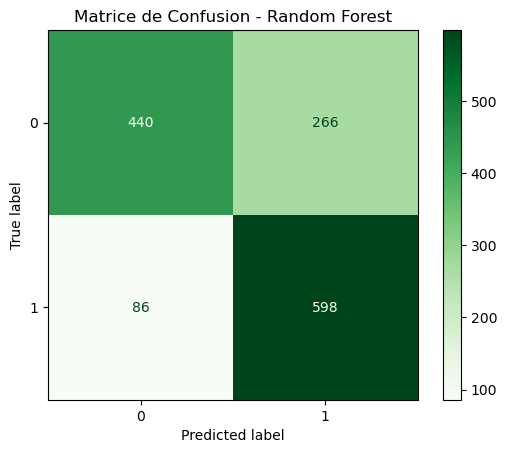

In [237]:
# 4. Pr√©diction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 5. √âvaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage
print("‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó")
print("‚ïë M√âTRIQUES DU MOD√àLE RANDOM FOREST  ‚ïë")
print("‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£")
print(f"‚ïë Accuracy: {accuracy:.4f}                   ‚ïë")
print(f"‚ïë Precision: {precision:.4f}                  ‚ïë")
print(f"‚ïë Recall: {recall:.4f}                     ‚ïë")
print(f"‚ïë F1-score: {f1:.4f}                   ‚ïë")
print(f"‚ïë ROC AUC: {roc_auc:.4f}                    ‚ïë")
print("‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù")

print("\nClassification Report d√©taill√©:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title("Matrice de Confusion - Random Forest")
plt.show()


## reseaux de neurone

In [284]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Pr√©paration des donn√©es
X = datatestset_clean[features]
y = datatestset_clean['is_generous'].astype(int)

# 2. Split des donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. R√©seau de neurones
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)
model.fit(X_train, y_train)


MLPClassifier(max_iter=300, random_state=42)

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë M√âTRIQUES DU R√âSEAU DE NEURONES    ‚ïë
‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£
‚ïë Accuracy: 0.7755                   ‚ïë
‚ïë Precision: 0.6886                  ‚ïë
‚ïë Recall: 0.9927                     ‚ïë
‚ïë F1-score: 0.8132                   ‚ïë
‚ïë ROC AUC: 0.7749                    ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù

Classification Report d√©taill√©:
              precision    recall  f1-score   support

           0       0.99      0.57      0.72       706
           1       0.69      0.99      0.81       684

    accuracy                           0.78      1390
   macro avg       0.84      0.78      0.77      1390
weighted avg       0.84      0.78      0.77      1390



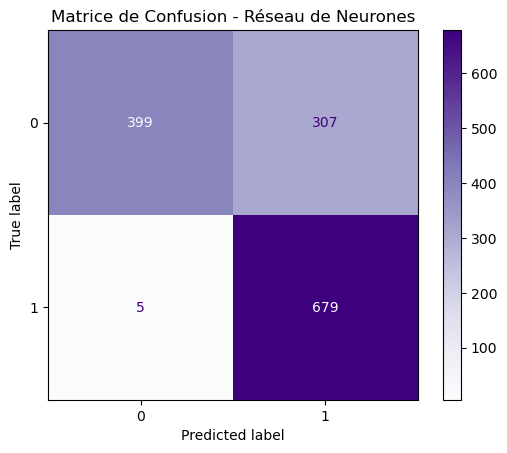

In [285]:

# 4. Pr√©diction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 5. √âvaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Affichage des m√©triques
print("‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó")
print("‚ïë M√âTRIQUES DU R√âSEAU DE NEURONES    ‚ïë")
print("‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£")
print(f"‚ïë Accuracy: {accuracy:.4f}                   ‚ïë")
print(f"‚ïë Precision: {precision:.4f}                  ‚ïë")
print(f"‚ïë Recall: {recall:.4f}                     ‚ïë")
print(f"‚ïë F1-score: {f1:.4f}                   ‚ïë")
print(f"‚ïë ROC AUC: {roc_auc:.4f}                    ‚ïë")
print("‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù")

print("\nClassification Report d√©taill√©:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title("Matrice de Confusion - R√©seau de Neurones")
plt.show()